## Aplicando BERT para Detecção de Bots do Twitter no PyTorch

**Objetivo:** Treinar uma rede neural BERT no Keras para detectar bots no Twitter utilizando o dataset Twitter-Bot Detection, disponível no Kaggle.

O objetivo dessa ponderada é construir um modelo de aprendizado profundo utilizando BERT (Bidirectional Encoder Representations from Transformers) para identificar contas de bots no Twitter. O dataset usado será o Twitter-Bot Detection, disponível no Kaggle, que contém informações sobre usuários do Twitter, incluindo seus tweets, seguidores e outras métricas associadas. O foco será na classificação binária, onde a tarefa é prever se uma conta é bot ou não.

### BERT (Bidirectional Encoder Representations from Transformers)


BERT é uma técnica de pré-treinamento de representações de linguagem bidirecional, que entende o contexto de uma palavra com base em todas as palavras ao redor dela. É especialmente útil para tarefas de NLP (Natural Language Processing) como classificação de texto, perguntas e respostas, e outras.

### Etapas:


As etapas do projeto incluem:

- Carregamento e visualização do dataset
- Tratamento de dados e pré-processamento
- Tokenização usando a biblioteca transformers da Hugging Face
- Construção do modelo utilizando BERT pré-treinado
- Treinamento e avaliação do modelo

### Pré-requisitos


Executar os seguintes comandos para instalar as dependências necessárias:

In [6]:
pip install tensorflow transformers pandas scikit-learn

Importação de bibliotecas:

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


In [8]:
print("\nCarregamento do dataset + primeiras linhas do dataset:")
df = pd.read_csv('/content/bot_detection_data.csv')
print(df.head())


Carregamento do dataset + primeiras linhas do dataset:
   User ID        Username                                              Tweet  \
0   132131           flong  Station activity person against natural majori...   
1   289683  hinesstephanie  Authority research natural life material staff...   
2   779715      roberttran  Manage whose quickly especially foot none to g...   
3   696168          pmason  Just cover eight opportunity strong policy which.   
4   704441          noah87                      Animal sign six data good or.   

   Retweet Count  Mention Count  Follower Count  Verified  Bot Label  \
0             85              1            2353     False          1   
1             55              5            9617      True          0   
2              6              2            4363      True          0   
3             54              5            2242      True          1   
4             26              3            8438     False          1   

       Location         

In [9]:
df

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention
...,...,...,...,...,...,...,...,...,...,...,...
49995,491196,uberg,Want but put card direction know miss former h...,64,0,9911,True,1,Lake Kimberlyburgh,2023-04-20 11:06:26,teach quality ten education any
49996,739297,jessicamunoz,Provide whole maybe agree church respond most ...,18,5,9900,False,1,Greenbury,2022-10-18 03:57:35,add walk among believe
49997,674475,lynncunningham,Bring different everyone international capital...,43,3,6313,True,1,Deborahfort,2020-07-08 03:54:08,onto admit artist first
49998,167081,richardthompson,Than about single generation itself seek sell ...,45,1,6343,False,0,Stephenside,2022-03-22 12:13:44,star


In [10]:
print("\nInformações gerais sobre o dataset:")
print(df.info())


Informações gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB
None


In [11]:
print("\nDescrição estatística do dataset:")
print(df.describe())


Descrição estatística do dataset:
             User ID  Retweet Count  Mention Count  Follower Count  \
count   50000.000000    50000.00000   50000.000000    50000.000000   
mean   548890.680540       50.00560       2.513760     4988.602380   
std    259756.681425       29.18116       1.708563     2878.742898   
min    100025.000000        0.00000       0.000000        0.000000   
25%    323524.250000       25.00000       1.000000     2487.750000   
50%    548147.000000       50.00000       3.000000     4991.500000   
75%    772983.000000       75.00000       4.000000     7471.000000   
max    999995.000000      100.00000       5.000000    10000.000000   

          Bot Label  
count  50000.000000  
mean       0.500360  
std        0.500005  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


In [12]:
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
User ID              0
Username             0
Tweet                0
Retweet Count        0
Mention Count        0
Follower Count       0
Verified             0
Bot Label            0
Location             0
Created At           0
Hashtags          8341
dtype: int64


In [13]:
print("\nValores únicos em cada coluna:")
print(df.nunique())


Valores únicos em cada coluna:
User ID           50000
Username          40566
Tweet             50000
Retweet Count       101
Mention Count         6
Follower Count     9923
Verified              2
Bot Label             2
Location          25199
Created At        49989
Hashtags          34247
dtype: int64


### Tratamento de Dados

Verificar se há valores ausentes e remover ou preencher esses valores conforme necessário.

O pré-processamento de texto será feito para normalizar e limpar os tweets, removendo caracteres especiais, links e outras informações irrelevantes.

In [14]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = tweet.lower()
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])
    return tweet

df['cleaned_tweet'] = df['Tweet'].apply(clean_tweet)

df = df.dropna(subset=['cleaned_tweet', 'Bot Label'])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Tokenização com BERT

Utilizar a biblioteca transformers da Hugging Face para tokenizar os tweets.
Isso envolve transformar o texto em tokens que o modelo BERT pode entender. Será utilizado o modelo pré-treinado **bert-base-uncased.**

#### Passos:
Passos:

- Carregar o Tokenizador BERT: O tokenizador pré-treinado bert-base-uncased é utilizado para processar o texto de forma padronizada.
- Tokenizar os Tweets: Cada tweet é convertido em uma sequência de tokens que BERT pode processar.
- Adicionar CLS e SEP: Esses tokens especiais são adicionados automaticamente. CLS indica o início da sequência e é utilizado pelo modelo para classificação, enquanto SEP marca o final da sequência.
- Retornar a Máscara de Atenção: A máscara de atenção indica quais tokens são relevantes (1) e quais são apenas preenchimento (0) para que o modelo saiba quais partes da sequência devem ser processadas.
- Retornar Tensores do TensorFlow: A função encode_plus retorna tensores prontos para serem usados no TensorFlow, incluindo os IDs dos tokens e as máscaras de atenção.
- Aplicar a Tokenização em Todo o Dataset: Cada tweet no dataset passa por esse processo de tokenização para ser utilizado no modelo.

In [15]:
from transformers import BertTokenizer
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_tweet(tweet, max_length=64):
    return tokenizer.encode_plus(
        tweet,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='tf'
    )

tokens = df['cleaned_tweet'].apply(lambda x: tokenize_tweet(x, max_length=64))
input_ids = np.array([t['input_ids'].numpy()[0] for t in tokens])
attention_masks = np.array([t['attention_mask'].numpy()[0] for t in tokens])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### Preparação dos Dados para Treinamento

Organização dos tokens, das máscaras de atenção e dos rótulos em um formato que pode ser usado para treinar o modelo.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['Bot Label'])

train_inputs, test_inputs, train_masks, test_masks, train_labels, test_labels = train_test_split(
    input_ids, attention_masks, labels, test_size=0.2, random_state=42
)

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = dict(enumerate(class_weights))


### Construção do Modelo BERT

Definição do modelo de classificação binária com BERT. A arquitetura inclui a camada BERT pré-treinada, seguida por um dropout e uma camada linear que reduz a saída para 1 neurônio (classificação binária), com ativação sigmoid.Otimizador AdamW é usado com uma taxa de aprendizado ajustada.

#### Passos:
- Carregar o Modelo Pré-Treinado BERT: O modelo bert-base-uncased é carregado da biblioteca Hugging Face transformers. Ele traz pesos pré-treinados de um grande conjunto de dados de texto.
- Congelar as Camadas do BERT: As camadas do BERT são congeladas (opcional) para garantir que apenas a última camada seja treinada, evitando o ajuste de pesos nas camadas já pré-treinadas.
- Camadas de Entrada: O modelo recebe os input_ids e as attention_masks que indicam a relevância dos tokens processados.
- Embeddings do BERT: A camada BERT gera representações vetoriais (embeddings) dos tokens de entrada, que capturam o contexto e o significado das palavras no texto.
- Camadas de Dropout e Linear:
 - O dropout (com probabilidade de 30%) é aplicado para regularizar o modelo, prevenindo overfitting.
  - A camada linear reduz a saída do BERT para um único neurônio (responsável pela classificação binária).
- Ativação Sigmoid: A função de ativação sigmoid é aplicada à saída da camada linear para garantir que os valores de saída estejam entre 0 e 1, adequados para uma tarefa de classificação binária.
- Compilação do Modelo (em PyTorch): O modelo é treinado usando o otimizador AdamW, que é uma variação do Adam com ajuste de taxa de aprendizado e regularização apropriada para modelos baseados em Transformers. A função de perda binária é usada (BCELoss), que é ideal para problemas de classificação binária.

In [19]:
import torch
from torch import nn
from transformers import BertModel, AdamW

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class BertForBinaryClassification(nn.Module):
    def __init__(self):
        super(BertForBinaryClassification, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(0.3)
        self.linear = nn.Linear(self.bert.config.hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]
        dropped_out = self.dropout(pooled_output)
        logits = self.linear(dropped_out)
        return self.sigmoid(logits)

model = BertForBinaryClassification().to(device)
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### Treinamento do modelo

In [20]:
from tqdm import tqdm
import torch

batch_size = 16
train_data = TensorDataset(torch.tensor(train_inputs), torch.tensor(train_masks), torch.tensor(train_labels))
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

criterion = nn.BCELoss()

model.train()
for epoch in range(3):
    total_loss = 0
    model.train()

    for batch_idx, batch in enumerate(tqdm(train_loader)):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.float().to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

        if batch_idx % 10 == 0:
            print(f'Epoch {epoch + 1} Batch {batch_idx} Loss: {loss.item()}')

    avg_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1} Average Loss: {avg_loss:.2f}')


  0%|          | 2/2500 [00:02<41:32,  1.00it/s]  

Epoch 1 Batch 0 Loss: 0.6812877058982849


  0%|          | 12/2500 [00:04<08:08,  5.09it/s]

Epoch 1 Batch 10 Loss: 0.6865073442459106


  1%|          | 22/2500 [00:05<07:26,  5.55it/s]

Epoch 1 Batch 20 Loss: 0.6843012571334839


  1%|▏         | 32/2500 [00:07<07:25,  5.54it/s]

Epoch 1 Batch 30 Loss: 0.6920047998428345


  2%|▏         | 42/2500 [00:09<07:05,  5.78it/s]

Epoch 1 Batch 40 Loss: 0.6655735373497009


  2%|▏         | 52/2500 [00:11<07:19,  5.56it/s]

Epoch 1 Batch 50 Loss: 0.7000254988670349


  2%|▏         | 62/2500 [00:13<07:24,  5.49it/s]

Epoch 1 Batch 60 Loss: 0.6535835266113281


  3%|▎         | 72/2500 [00:15<07:08,  5.66it/s]

Epoch 1 Batch 70 Loss: 0.7505059242248535


  3%|▎         | 82/2500 [00:16<07:05,  5.68it/s]

Epoch 1 Batch 80 Loss: 0.7306629419326782


  4%|▎         | 92/2500 [00:18<07:04,  5.67it/s]

Epoch 1 Batch 90 Loss: 0.6686526536941528


  4%|▍         | 102/2500 [00:20<07:05,  5.64it/s]

Epoch 1 Batch 100 Loss: 0.6870220899581909


  4%|▍         | 112/2500 [00:22<07:06,  5.60it/s]

Epoch 1 Batch 110 Loss: 0.6898660659790039


  5%|▍         | 122/2500 [00:23<07:05,  5.60it/s]

Epoch 1 Batch 120 Loss: 0.6756420135498047


  5%|▌         | 132/2500 [00:25<07:06,  5.55it/s]

Epoch 1 Batch 130 Loss: 0.7046977281570435


  6%|▌         | 142/2500 [00:27<07:06,  5.53it/s]

Epoch 1 Batch 140 Loss: 0.6735110282897949


  6%|▌         | 152/2500 [00:29<07:02,  5.56it/s]

Epoch 1 Batch 150 Loss: 0.6972451210021973


  6%|▋         | 162/2500 [00:31<07:05,  5.50it/s]

Epoch 1 Batch 160 Loss: 0.6782243847846985


  7%|▋         | 172/2500 [00:32<07:03,  5.49it/s]

Epoch 1 Batch 170 Loss: 0.667574405670166


  7%|▋         | 182/2500 [00:34<07:00,  5.51it/s]

Epoch 1 Batch 180 Loss: 0.6912631988525391


  8%|▊         | 192/2500 [00:36<07:02,  5.47it/s]

Epoch 1 Batch 190 Loss: 0.697632908821106


  8%|▊         | 202/2500 [00:38<07:04,  5.41it/s]

Epoch 1 Batch 200 Loss: 0.7356081008911133


  8%|▊         | 212/2500 [00:40<07:07,  5.35it/s]

Epoch 1 Batch 210 Loss: 0.7266011834144592


  9%|▉         | 222/2500 [00:42<07:03,  5.38it/s]

Epoch 1 Batch 220 Loss: 0.6882040500640869


  9%|▉         | 232/2500 [00:43<07:01,  5.38it/s]

Epoch 1 Batch 230 Loss: 0.707851231098175


 10%|▉         | 242/2500 [00:45<06:56,  5.42it/s]

Epoch 1 Batch 240 Loss: 0.7465114593505859


 10%|█         | 252/2500 [00:47<07:00,  5.35it/s]

Epoch 1 Batch 250 Loss: 0.7082833051681519


 10%|█         | 262/2500 [00:49<06:57,  5.36it/s]

Epoch 1 Batch 260 Loss: 0.6824686527252197


 11%|█         | 272/2500 [00:51<06:58,  5.33it/s]

Epoch 1 Batch 270 Loss: 0.6749510169029236


 11%|█▏        | 282/2500 [00:53<06:56,  5.32it/s]

Epoch 1 Batch 280 Loss: 0.7312741279602051


 12%|█▏        | 292/2500 [00:55<06:53,  5.34it/s]

Epoch 1 Batch 290 Loss: 0.675477147102356


 12%|█▏        | 302/2500 [00:57<06:46,  5.41it/s]

Epoch 1 Batch 300 Loss: 0.6816787719726562


 12%|█▏        | 312/2500 [00:58<06:43,  5.43it/s]

Epoch 1 Batch 310 Loss: 0.6820379495620728


 13%|█▎        | 322/2500 [01:00<06:40,  5.44it/s]

Epoch 1 Batch 320 Loss: 0.683505654335022


 13%|█▎        | 332/2500 [01:02<06:39,  5.43it/s]

Epoch 1 Batch 330 Loss: 0.6992651224136353


 14%|█▎        | 342/2500 [01:04<06:37,  5.43it/s]

Epoch 1 Batch 340 Loss: 0.6760588884353638


 14%|█▍        | 352/2500 [01:06<06:34,  5.45it/s]

Epoch 1 Batch 350 Loss: 0.7098262310028076


 14%|█▍        | 362/2500 [01:08<06:29,  5.49it/s]

Epoch 1 Batch 360 Loss: 0.6571049690246582


 15%|█▍        | 372/2500 [01:09<06:26,  5.50it/s]

Epoch 1 Batch 370 Loss: 0.691709578037262


 15%|█▌        | 382/2500 [01:11<06:24,  5.51it/s]

Epoch 1 Batch 380 Loss: 0.6821277141571045


 16%|█▌        | 392/2500 [01:13<06:19,  5.55it/s]

Epoch 1 Batch 390 Loss: 0.736493706703186


 16%|█▌        | 402/2500 [01:15<06:18,  5.54it/s]

Epoch 1 Batch 400 Loss: 0.6969883441925049


 16%|█▋        | 412/2500 [01:17<06:20,  5.49it/s]

Epoch 1 Batch 410 Loss: 0.7263091802597046


 17%|█▋        | 422/2500 [01:19<06:59,  4.96it/s]

Epoch 1 Batch 420 Loss: 0.689032793045044


 17%|█▋        | 432/2500 [01:21<06:37,  5.21it/s]

Epoch 1 Batch 430 Loss: 0.6908688545227051


 18%|█▊        | 442/2500 [01:23<06:11,  5.55it/s]

Epoch 1 Batch 440 Loss: 0.6454455256462097


 18%|█▊        | 452/2500 [01:25<06:05,  5.61it/s]

Epoch 1 Batch 450 Loss: 0.7308587431907654


 18%|█▊        | 462/2500 [01:26<06:04,  5.60it/s]

Epoch 1 Batch 460 Loss: 0.7340697646141052


 19%|█▉        | 472/2500 [01:28<06:03,  5.57it/s]

Epoch 1 Batch 470 Loss: 0.7240429520606995


 19%|█▉        | 482/2500 [01:30<06:01,  5.58it/s]

Epoch 1 Batch 480 Loss: 0.7320388555526733


 20%|█▉        | 492/2500 [01:32<06:03,  5.52it/s]

Epoch 1 Batch 490 Loss: 0.7222268581390381


 20%|██        | 502/2500 [01:33<05:56,  5.60it/s]

Epoch 1 Batch 500 Loss: 0.6889218688011169


 20%|██        | 512/2500 [01:35<05:56,  5.57it/s]

Epoch 1 Batch 510 Loss: 0.6700069308280945


 21%|██        | 522/2500 [01:37<06:12,  5.32it/s]

Epoch 1 Batch 520 Loss: 0.7399520874023438


 21%|██▏       | 532/2500 [01:39<05:53,  5.57it/s]

Epoch 1 Batch 530 Loss: 0.696297824382782


 22%|██▏       | 542/2500 [01:41<05:50,  5.58it/s]

Epoch 1 Batch 540 Loss: 0.6849746108055115


 22%|██▏       | 552/2500 [01:42<05:50,  5.55it/s]

Epoch 1 Batch 550 Loss: 0.6702447533607483


 22%|██▏       | 562/2500 [01:44<05:52,  5.50it/s]

Epoch 1 Batch 560 Loss: 0.6858888864517212


 23%|██▎       | 572/2500 [01:46<05:47,  5.54it/s]

Epoch 1 Batch 570 Loss: 0.7189999222755432


 23%|██▎       | 582/2500 [01:48<05:43,  5.58it/s]

Epoch 1 Batch 580 Loss: 0.6530933976173401


 24%|██▎       | 592/2500 [01:50<05:44,  5.54it/s]

Epoch 1 Batch 590 Loss: 0.6835823059082031


 24%|██▍       | 602/2500 [01:51<05:42,  5.55it/s]

Epoch 1 Batch 600 Loss: 0.7301715612411499


 24%|██▍       | 612/2500 [01:53<05:41,  5.53it/s]

Epoch 1 Batch 610 Loss: 0.706925630569458


 25%|██▍       | 622/2500 [01:55<05:38,  5.54it/s]

Epoch 1 Batch 620 Loss: 0.7639724612236023


 25%|██▌       | 632/2500 [01:57<05:39,  5.50it/s]

Epoch 1 Batch 630 Loss: 0.7263134717941284


 26%|██▌       | 642/2500 [01:59<05:38,  5.49it/s]

Epoch 1 Batch 640 Loss: 0.6527483463287354


 26%|██▌       | 652/2500 [02:01<05:33,  5.55it/s]

Epoch 1 Batch 650 Loss: 0.6646043062210083


 26%|██▋       | 662/2500 [02:02<05:33,  5.51it/s]

Epoch 1 Batch 660 Loss: 0.7853468060493469


 27%|██▋       | 672/2500 [02:04<05:30,  5.52it/s]

Epoch 1 Batch 670 Loss: 0.7353750467300415


 27%|██▋       | 682/2500 [02:06<05:31,  5.49it/s]

Epoch 1 Batch 680 Loss: 0.7120459079742432


 28%|██▊       | 692/2500 [02:08<05:28,  5.50it/s]

Epoch 1 Batch 690 Loss: 0.684285581111908


 28%|██▊       | 702/2500 [02:10<05:30,  5.45it/s]

Epoch 1 Batch 700 Loss: 0.6900069713592529


 28%|██▊       | 712/2500 [02:11<05:28,  5.44it/s]

Epoch 1 Batch 710 Loss: 0.7365270853042603


 29%|██▉       | 722/2500 [02:13<05:24,  5.48it/s]

Epoch 1 Batch 720 Loss: 0.6916532516479492


 29%|██▉       | 732/2500 [02:15<05:20,  5.52it/s]

Epoch 1 Batch 730 Loss: 0.7108176946640015


 30%|██▉       | 742/2500 [02:17<05:20,  5.48it/s]

Epoch 1 Batch 740 Loss: 0.664238452911377


 30%|███       | 752/2500 [02:19<05:17,  5.50it/s]

Epoch 1 Batch 750 Loss: 0.6765754818916321


 30%|███       | 762/2500 [02:21<05:17,  5.48it/s]

Epoch 1 Batch 760 Loss: 0.7087889909744263


 31%|███       | 772/2500 [02:22<05:14,  5.50it/s]

Epoch 1 Batch 770 Loss: 0.7210595607757568


 31%|███▏      | 782/2500 [02:24<05:12,  5.49it/s]

Epoch 1 Batch 780 Loss: 0.7025244235992432


 32%|███▏      | 792/2500 [02:26<05:11,  5.49it/s]

Epoch 1 Batch 790 Loss: 0.7435129284858704


 32%|███▏      | 802/2500 [02:28<05:10,  5.47it/s]

Epoch 1 Batch 800 Loss: 0.6855195760726929


 32%|███▏      | 812/2500 [02:30<05:05,  5.53it/s]

Epoch 1 Batch 810 Loss: 0.6832027435302734


 33%|███▎      | 822/2500 [02:31<05:04,  5.51it/s]

Epoch 1 Batch 820 Loss: 0.700475811958313


 33%|███▎      | 832/2500 [02:33<05:03,  5.50it/s]

Epoch 1 Batch 830 Loss: 0.7399202585220337


 34%|███▎      | 842/2500 [02:35<05:04,  5.45it/s]

Epoch 1 Batch 840 Loss: 0.6705199480056763


 34%|███▍      | 852/2500 [02:37<05:01,  5.46it/s]

Epoch 1 Batch 850 Loss: 0.7413020133972168


 34%|███▍      | 862/2500 [02:39<04:57,  5.52it/s]

Epoch 1 Batch 860 Loss: 0.7318515777587891


 35%|███▍      | 872/2500 [02:41<04:56,  5.49it/s]

Epoch 1 Batch 870 Loss: 0.7301841378211975


 35%|███▌      | 882/2500 [02:42<04:53,  5.51it/s]

Epoch 1 Batch 880 Loss: 0.6790730357170105


 36%|███▌      | 892/2500 [02:44<04:52,  5.50it/s]

Epoch 1 Batch 890 Loss: 0.6919469237327576


 36%|███▌      | 902/2500 [02:46<04:48,  5.54it/s]

Epoch 1 Batch 900 Loss: 0.7243081331253052


 36%|███▋      | 912/2500 [02:48<04:48,  5.50it/s]

Epoch 1 Batch 910 Loss: 0.7431598901748657


 37%|███▋      | 922/2500 [02:50<04:47,  5.49it/s]

Epoch 1 Batch 920 Loss: 0.6817860007286072


 37%|███▋      | 932/2500 [02:51<04:43,  5.53it/s]

Epoch 1 Batch 930 Loss: 0.6906424760818481


 38%|███▊      | 942/2500 [02:53<04:40,  5.54it/s]

Epoch 1 Batch 940 Loss: 0.7019436359405518


 38%|███▊      | 952/2500 [02:55<04:38,  5.56it/s]

Epoch 1 Batch 950 Loss: 0.704373836517334


 38%|███▊      | 962/2500 [02:57<04:36,  5.56it/s]

Epoch 1 Batch 960 Loss: 0.7639460563659668


 39%|███▉      | 972/2500 [02:59<04:36,  5.53it/s]

Epoch 1 Batch 970 Loss: 0.7314645648002625


 39%|███▉      | 982/2500 [03:00<04:34,  5.53it/s]

Epoch 1 Batch 980 Loss: 0.6924023628234863


 40%|███▉      | 992/2500 [03:02<04:33,  5.50it/s]

Epoch 1 Batch 990 Loss: 0.6829184293746948


 40%|████      | 1002/2500 [03:04<04:30,  5.53it/s]

Epoch 1 Batch 1000 Loss: 0.6613326668739319


 40%|████      | 1012/2500 [03:06<04:30,  5.50it/s]

Epoch 1 Batch 1010 Loss: 0.663314700126648


 41%|████      | 1022/2500 [03:08<04:28,  5.51it/s]

Epoch 1 Batch 1020 Loss: 0.6601778268814087


 41%|████▏     | 1032/2500 [03:10<04:26,  5.51it/s]

Epoch 1 Batch 1030 Loss: 0.6917306184768677


 42%|████▏     | 1042/2500 [03:11<04:24,  5.51it/s]

Epoch 1 Batch 1040 Loss: 0.637573778629303


 42%|████▏     | 1052/2500 [03:13<04:22,  5.52it/s]

Epoch 1 Batch 1050 Loss: 0.7446784973144531


 42%|████▏     | 1062/2500 [03:15<04:23,  5.46it/s]

Epoch 1 Batch 1060 Loss: 0.6585255861282349


 43%|████▎     | 1072/2500 [03:17<04:19,  5.50it/s]

Epoch 1 Batch 1070 Loss: 0.7250562310218811


 43%|████▎     | 1082/2500 [03:19<04:17,  5.51it/s]

Epoch 1 Batch 1080 Loss: 0.669883131980896


 44%|████▎     | 1092/2500 [03:20<04:14,  5.53it/s]

Epoch 1 Batch 1090 Loss: 0.7267099022865295


 44%|████▍     | 1102/2500 [03:22<04:14,  5.50it/s]

Epoch 1 Batch 1100 Loss: 0.7107383012771606


 44%|████▍     | 1112/2500 [03:24<04:25,  5.23it/s]

Epoch 1 Batch 1110 Loss: 0.6897972822189331


 45%|████▍     | 1122/2500 [03:26<04:10,  5.50it/s]

Epoch 1 Batch 1120 Loss: 0.6608288884162903


 45%|████▌     | 1132/2500 [03:28<04:10,  5.45it/s]

Epoch 1 Batch 1130 Loss: 0.7100990414619446


 46%|████▌     | 1142/2500 [03:30<04:05,  5.52it/s]

Epoch 1 Batch 1140 Loss: 0.715829610824585


 46%|████▌     | 1152/2500 [03:31<04:05,  5.50it/s]

Epoch 1 Batch 1150 Loss: 0.6918258666992188


 46%|████▋     | 1162/2500 [03:33<04:03,  5.50it/s]

Epoch 1 Batch 1160 Loss: 0.675230860710144


 47%|████▋     | 1172/2500 [03:35<04:02,  5.49it/s]

Epoch 1 Batch 1170 Loss: 0.7181702852249146


 47%|████▋     | 1182/2500 [03:37<03:59,  5.49it/s]

Epoch 1 Batch 1180 Loss: 0.7003122568130493


 48%|████▊     | 1192/2500 [03:39<03:57,  5.50it/s]

Epoch 1 Batch 1190 Loss: 0.7129203081130981


 48%|████▊     | 1202/2500 [03:40<03:57,  5.47it/s]

Epoch 1 Batch 1200 Loss: 0.6847249865531921


 48%|████▊     | 1212/2500 [03:42<03:53,  5.53it/s]

Epoch 1 Batch 1210 Loss: 0.7100943326950073


 49%|████▉     | 1222/2500 [03:44<03:52,  5.50it/s]

Epoch 1 Batch 1220 Loss: 0.6788058280944824


 49%|████▉     | 1232/2500 [03:46<03:48,  5.55it/s]

Epoch 1 Batch 1230 Loss: 0.7065567970275879


 50%|████▉     | 1242/2500 [03:48<03:47,  5.53it/s]

Epoch 1 Batch 1240 Loss: 0.7157413959503174


 50%|█████     | 1252/2500 [03:50<03:47,  5.49it/s]

Epoch 1 Batch 1250 Loss: 0.7275525331497192


 50%|█████     | 1262/2500 [03:51<03:44,  5.51it/s]

Epoch 1 Batch 1260 Loss: 0.6679800748825073


 51%|█████     | 1272/2500 [03:53<03:44,  5.48it/s]

Epoch 1 Batch 1270 Loss: 0.7197318077087402


 51%|█████▏    | 1282/2500 [03:55<03:41,  5.50it/s]

Epoch 1 Batch 1280 Loss: 0.7062238454818726


 52%|█████▏    | 1292/2500 [03:57<03:39,  5.51it/s]

Epoch 1 Batch 1290 Loss: 0.6910067796707153


 52%|█████▏    | 1302/2500 [03:59<03:36,  5.53it/s]

Epoch 1 Batch 1300 Loss: 0.7145295143127441


 52%|█████▏    | 1312/2500 [04:00<03:34,  5.53it/s]

Epoch 1 Batch 1310 Loss: 0.7076292037963867


 53%|█████▎    | 1322/2500 [04:02<03:34,  5.50it/s]

Epoch 1 Batch 1320 Loss: 0.6776221990585327


 53%|█████▎    | 1332/2500 [04:04<03:31,  5.52it/s]

Epoch 1 Batch 1330 Loss: 0.7387369871139526


 54%|█████▎    | 1342/2500 [04:06<03:32,  5.45it/s]

Epoch 1 Batch 1340 Loss: 0.645374596118927


 54%|█████▍    | 1352/2500 [04:08<03:28,  5.51it/s]

Epoch 1 Batch 1350 Loss: 0.6950082182884216


 54%|█████▍    | 1362/2500 [04:10<03:27,  5.48it/s]

Epoch 1 Batch 1360 Loss: 0.6789119243621826


 55%|█████▍    | 1372/2500 [04:11<03:23,  5.54it/s]

Epoch 1 Batch 1370 Loss: 0.7204716205596924


 55%|█████▌    | 1382/2500 [04:13<03:22,  5.53it/s]

Epoch 1 Batch 1380 Loss: 0.67945396900177


 56%|█████▌    | 1392/2500 [04:15<03:20,  5.53it/s]

Epoch 1 Batch 1390 Loss: 0.6851346492767334


 56%|█████▌    | 1402/2500 [04:17<03:19,  5.50it/s]

Epoch 1 Batch 1400 Loss: 0.6672612428665161


 56%|█████▋    | 1412/2500 [04:19<03:18,  5.49it/s]

Epoch 1 Batch 1410 Loss: 0.6790208220481873


 57%|█████▋    | 1422/2500 [04:20<03:16,  5.50it/s]

Epoch 1 Batch 1420 Loss: 0.7337701320648193


 57%|█████▋    | 1432/2500 [04:22<03:12,  5.54it/s]

Epoch 1 Batch 1430 Loss: 0.6910591125488281


 58%|█████▊    | 1442/2500 [04:24<03:11,  5.52it/s]

Epoch 1 Batch 1440 Loss: 0.7239543199539185


 58%|█████▊    | 1452/2500 [04:26<03:09,  5.54it/s]

Epoch 1 Batch 1450 Loss: 0.7196959257125854


 58%|█████▊    | 1462/2500 [04:28<03:07,  5.55it/s]

Epoch 1 Batch 1460 Loss: 0.7297545671463013


 59%|█████▉    | 1472/2500 [04:29<03:06,  5.52it/s]

Epoch 1 Batch 1470 Loss: 0.7466201186180115


 59%|█████▉    | 1482/2500 [04:31<03:06,  5.47it/s]

Epoch 1 Batch 1480 Loss: 0.6566903591156006


 60%|█████▉    | 1492/2500 [04:33<03:03,  5.51it/s]

Epoch 1 Batch 1490 Loss: 0.720591127872467


 60%|██████    | 1502/2500 [04:35<03:01,  5.49it/s]

Epoch 1 Batch 1500 Loss: 0.7296823263168335


 60%|██████    | 1512/2500 [04:37<02:59,  5.50it/s]

Epoch 1 Batch 1510 Loss: 0.6926384568214417


 61%|██████    | 1522/2500 [04:39<02:56,  5.53it/s]

Epoch 1 Batch 1520 Loss: 0.7357659935951233


 61%|██████▏   | 1532/2500 [04:40<02:55,  5.53it/s]

Epoch 1 Batch 1530 Loss: 0.6733431220054626


 62%|██████▏   | 1542/2500 [04:42<02:54,  5.49it/s]

Epoch 1 Batch 1540 Loss: 0.7280126810073853


 62%|██████▏   | 1552/2500 [04:44<02:53,  5.47it/s]

Epoch 1 Batch 1550 Loss: 0.6544997096061707


 62%|██████▏   | 1562/2500 [04:46<02:51,  5.47it/s]

Epoch 1 Batch 1560 Loss: 0.7106626629829407


 63%|██████▎   | 1572/2500 [04:48<02:48,  5.52it/s]

Epoch 1 Batch 1570 Loss: 0.6930129528045654


 63%|██████▎   | 1582/2500 [04:49<02:46,  5.52it/s]

Epoch 1 Batch 1580 Loss: 0.7171385884284973


 64%|██████▎   | 1592/2500 [04:51<02:44,  5.53it/s]

Epoch 1 Batch 1590 Loss: 0.6792376041412354


 64%|██████▍   | 1602/2500 [04:53<02:42,  5.53it/s]

Epoch 1 Batch 1600 Loss: 0.6754955649375916


 64%|██████▍   | 1612/2500 [04:55<02:39,  5.56it/s]

Epoch 1 Batch 1610 Loss: 0.6185305118560791


 65%|██████▍   | 1622/2500 [04:57<02:39,  5.49it/s]

Epoch 1 Batch 1620 Loss: 0.7446905374526978


 65%|██████▌   | 1632/2500 [04:59<02:39,  5.46it/s]

Epoch 1 Batch 1630 Loss: 0.7054920196533203


 66%|██████▌   | 1642/2500 [05:00<02:34,  5.55it/s]

Epoch 1 Batch 1640 Loss: 0.7480929493904114


 66%|██████▌   | 1652/2500 [05:02<02:33,  5.52it/s]

Epoch 1 Batch 1650 Loss: 0.689798891544342


 66%|██████▋   | 1662/2500 [05:04<02:31,  5.54it/s]

Epoch 1 Batch 1660 Loss: 0.7269529104232788


 67%|██████▋   | 1672/2500 [05:06<02:29,  5.54it/s]

Epoch 1 Batch 1670 Loss: 0.6635348796844482


 67%|██████▋   | 1682/2500 [05:08<02:27,  5.56it/s]

Epoch 1 Batch 1680 Loss: 0.6621032357215881


 68%|██████▊   | 1692/2500 [05:09<02:26,  5.51it/s]

Epoch 1 Batch 1690 Loss: 0.7173630595207214


 68%|██████▊   | 1702/2500 [05:11<02:25,  5.47it/s]

Epoch 1 Batch 1700 Loss: 0.7606002688407898


 68%|██████▊   | 1712/2500 [05:13<02:22,  5.52it/s]

Epoch 1 Batch 1710 Loss: 0.7097887396812439


 69%|██████▉   | 1722/2500 [05:15<02:20,  5.52it/s]

Epoch 1 Batch 1720 Loss: 0.7258745431900024


 69%|██████▉   | 1732/2500 [05:17<02:19,  5.52it/s]

Epoch 1 Batch 1730 Loss: 0.6790980696678162


 70%|██████▉   | 1742/2500 [05:18<02:17,  5.51it/s]

Epoch 1 Batch 1740 Loss: 0.719470739364624


 70%|███████   | 1752/2500 [05:20<02:14,  5.56it/s]

Epoch 1 Batch 1750 Loss: 0.7086547017097473


 70%|███████   | 1762/2500 [05:22<02:13,  5.52it/s]

Epoch 1 Batch 1760 Loss: 0.6655483245849609


 71%|███████   | 1772/2500 [05:24<02:11,  5.52it/s]

Epoch 1 Batch 1770 Loss: 0.6886478662490845


 71%|███████▏  | 1782/2500 [05:26<02:09,  5.55it/s]

Epoch 1 Batch 1780 Loss: 0.7148683667182922


 72%|███████▏  | 1792/2500 [05:27<02:08,  5.52it/s]

Epoch 1 Batch 1790 Loss: 0.6884623765945435


 72%|███████▏  | 1802/2500 [05:29<02:06,  5.51it/s]

Epoch 1 Batch 1800 Loss: 0.7305634021759033


 72%|███████▏  | 1812/2500 [05:31<02:04,  5.54it/s]

Epoch 1 Batch 1810 Loss: 0.7003688812255859


 73%|███████▎  | 1822/2500 [05:33<02:03,  5.50it/s]

Epoch 1 Batch 1820 Loss: 0.6557295322418213


 73%|███████▎  | 1832/2500 [05:35<02:01,  5.51it/s]

Epoch 1 Batch 1830 Loss: 0.7126656770706177


 74%|███████▎  | 1842/2500 [05:37<01:59,  5.50it/s]

Epoch 1 Batch 1840 Loss: 0.6996515989303589


 74%|███████▍  | 1852/2500 [05:38<01:57,  5.53it/s]

Epoch 1 Batch 1850 Loss: 0.7123807072639465


 74%|███████▍  | 1862/2500 [05:40<01:55,  5.51it/s]

Epoch 1 Batch 1860 Loss: 0.6754723787307739


 75%|███████▍  | 1872/2500 [05:42<01:53,  5.52it/s]

Epoch 1 Batch 1870 Loss: 0.7079771161079407


 75%|███████▌  | 1882/2500 [05:44<01:51,  5.55it/s]

Epoch 1 Batch 1880 Loss: 0.6608172655105591


 76%|███████▌  | 1892/2500 [05:46<01:50,  5.51it/s]

Epoch 1 Batch 1890 Loss: 0.7606271505355835


 76%|███████▌  | 1902/2500 [05:47<01:47,  5.54it/s]

Epoch 1 Batch 1900 Loss: 0.7007052898406982


 76%|███████▋  | 1912/2500 [05:49<01:47,  5.47it/s]

Epoch 1 Batch 1910 Loss: 0.6838860511779785


 77%|███████▋  | 1922/2500 [05:51<01:45,  5.50it/s]

Epoch 1 Batch 1920 Loss: 0.7152464985847473


 77%|███████▋  | 1932/2500 [05:53<01:42,  5.53it/s]

Epoch 1 Batch 1930 Loss: 0.7323606014251709


 78%|███████▊  | 1942/2500 [05:55<01:40,  5.53it/s]

Epoch 1 Batch 1940 Loss: 0.7200373411178589


 78%|███████▊  | 1952/2500 [05:56<01:39,  5.52it/s]

Epoch 1 Batch 1950 Loss: 0.6586058139801025


 78%|███████▊  | 1962/2500 [05:58<01:37,  5.51it/s]

Epoch 1 Batch 1960 Loss: 0.7243549823760986


 79%|███████▉  | 1972/2500 [06:00<01:35,  5.54it/s]

Epoch 1 Batch 1970 Loss: 0.7429279685020447


 79%|███████▉  | 1982/2500 [06:02<01:35,  5.41it/s]

Epoch 1 Batch 1980 Loss: 0.7367975115776062


 80%|███████▉  | 1992/2500 [06:04<01:32,  5.51it/s]

Epoch 1 Batch 1990 Loss: 0.7081000804901123


 80%|████████  | 2002/2500 [06:06<01:29,  5.55it/s]

Epoch 1 Batch 2000 Loss: 0.7070910930633545


 80%|████████  | 2012/2500 [06:07<01:27,  5.55it/s]

Epoch 1 Batch 2010 Loss: 0.7691984176635742


 81%|████████  | 2022/2500 [06:09<01:26,  5.52it/s]

Epoch 1 Batch 2020 Loss: 0.7139977216720581


 81%|████████▏ | 2032/2500 [06:11<01:24,  5.53it/s]

Epoch 1 Batch 2030 Loss: 0.7212841510772705


 82%|████████▏ | 2042/2500 [06:13<01:23,  5.51it/s]

Epoch 1 Batch 2040 Loss: 0.7507418394088745


 82%|████████▏ | 2052/2500 [06:15<01:21,  5.51it/s]

Epoch 1 Batch 2050 Loss: 0.6946929693222046


 82%|████████▏ | 2062/2500 [06:16<01:19,  5.51it/s]

Epoch 1 Batch 2060 Loss: 0.7055284976959229


 83%|████████▎ | 2072/2500 [06:18<01:17,  5.54it/s]

Epoch 1 Batch 2070 Loss: 0.7484928369522095


 83%|████████▎ | 2082/2500 [06:20<01:15,  5.54it/s]

Epoch 1 Batch 2080 Loss: 0.7374672889709473


 84%|████████▎ | 2092/2500 [06:22<01:13,  5.55it/s]

Epoch 1 Batch 2090 Loss: 0.7015372514724731


 84%|████████▍ | 2102/2500 [06:24<01:11,  5.54it/s]

Epoch 1 Batch 2100 Loss: 0.6704127788543701


 84%|████████▍ | 2112/2500 [06:25<01:10,  5.53it/s]

Epoch 1 Batch 2110 Loss: 0.723718523979187


 85%|████████▍ | 2122/2500 [06:27<01:09,  5.46it/s]

Epoch 1 Batch 2120 Loss: 0.6574352383613586


 85%|████████▌ | 2132/2500 [06:29<01:07,  5.49it/s]

Epoch 1 Batch 2130 Loss: 0.6931380033493042


 86%|████████▌ | 2142/2500 [06:31<01:04,  5.53it/s]

Epoch 1 Batch 2140 Loss: 0.6844332814216614


 86%|████████▌ | 2152/2500 [06:33<01:03,  5.48it/s]

Epoch 1 Batch 2150 Loss: 0.6647330522537231


 86%|████████▋ | 2162/2500 [06:35<01:01,  5.51it/s]

Epoch 1 Batch 2160 Loss: 0.7320858836174011


 87%|████████▋ | 2172/2500 [06:36<00:59,  5.49it/s]

Epoch 1 Batch 2170 Loss: 0.7479588389396667


 87%|████████▋ | 2182/2500 [06:38<00:57,  5.51it/s]

Epoch 1 Batch 2180 Loss: 0.7399278879165649


 88%|████████▊ | 2192/2500 [06:40<00:56,  5.49it/s]

Epoch 1 Batch 2190 Loss: 0.6891199350357056


 88%|████████▊ | 2202/2500 [06:42<00:53,  5.53it/s]

Epoch 1 Batch 2200 Loss: 0.6934047937393188


 88%|████████▊ | 2212/2500 [06:44<00:51,  5.56it/s]

Epoch 1 Batch 2210 Loss: 0.7072402238845825


 89%|████████▉ | 2222/2500 [06:45<00:50,  5.51it/s]

Epoch 1 Batch 2220 Loss: 0.6889520883560181


 89%|████████▉ | 2232/2500 [06:47<00:48,  5.51it/s]

Epoch 1 Batch 2230 Loss: 0.7014737129211426


 90%|████████▉ | 2242/2500 [06:49<00:46,  5.52it/s]

Epoch 1 Batch 2240 Loss: 0.6720496416091919


 90%|█████████ | 2252/2500 [06:51<00:45,  5.50it/s]

Epoch 1 Batch 2250 Loss: 0.706239640712738


 90%|█████████ | 2262/2500 [06:53<00:43,  5.50it/s]

Epoch 1 Batch 2260 Loss: 0.7081090211868286


 91%|█████████ | 2272/2500 [06:54<00:41,  5.52it/s]

Epoch 1 Batch 2270 Loss: 0.7307963967323303


 91%|█████████▏| 2282/2500 [06:56<00:39,  5.55it/s]

Epoch 1 Batch 2280 Loss: 0.6616541743278503


 92%|█████████▏| 2292/2500 [06:58<00:37,  5.50it/s]

Epoch 1 Batch 2290 Loss: 0.7057563066482544


 92%|█████████▏| 2302/2500 [07:00<00:36,  5.48it/s]

Epoch 1 Batch 2300 Loss: 0.6760726571083069


 92%|█████████▏| 2312/2500 [07:02<00:34,  5.50it/s]

Epoch 1 Batch 2310 Loss: 0.7327707409858704


 93%|█████████▎| 2322/2500 [07:04<00:32,  5.53it/s]

Epoch 1 Batch 2320 Loss: 0.7420891523361206


 93%|█████████▎| 2332/2500 [07:05<00:30,  5.51it/s]

Epoch 1 Batch 2330 Loss: 0.6974170207977295


 94%|█████████▎| 2342/2500 [07:07<00:29,  5.44it/s]

Epoch 1 Batch 2340 Loss: 0.7238481640815735


 94%|█████████▍| 2352/2500 [07:09<00:27,  5.44it/s]

Epoch 1 Batch 2350 Loss: 0.7029164433479309


 94%|█████████▍| 2362/2500 [07:11<00:26,  5.23it/s]

Epoch 1 Batch 2360 Loss: 0.6705172061920166


 95%|█████████▍| 2372/2500 [07:13<00:24,  5.29it/s]

Epoch 1 Batch 2370 Loss: 0.7266827821731567


 95%|█████████▌| 2382/2500 [07:15<00:21,  5.55it/s]

Epoch 1 Batch 2380 Loss: 0.6889846324920654


 96%|█████████▌| 2392/2500 [07:17<00:19,  5.53it/s]

Epoch 1 Batch 2390 Loss: 0.751072883605957


 96%|█████████▌| 2402/2500 [07:18<00:17,  5.51it/s]

Epoch 1 Batch 2400 Loss: 0.738179087638855


 96%|█████████▋| 2412/2500 [07:20<00:16,  5.47it/s]

Epoch 1 Batch 2410 Loss: 0.7225067615509033


 97%|█████████▋| 2422/2500 [07:22<00:14,  5.53it/s]

Epoch 1 Batch 2420 Loss: 0.7489042282104492


 97%|█████████▋| 2432/2500 [07:24<00:12,  5.54it/s]

Epoch 1 Batch 2430 Loss: 0.6466584205627441


 98%|█████████▊| 2442/2500 [07:26<00:10,  5.56it/s]

Epoch 1 Batch 2440 Loss: 0.6680452227592468


 98%|█████████▊| 2452/2500 [07:27<00:08,  5.52it/s]

Epoch 1 Batch 2450 Loss: 0.7237171530723572


 98%|█████████▊| 2462/2500 [07:29<00:06,  5.54it/s]

Epoch 1 Batch 2460 Loss: 0.7493206262588501


 99%|█████████▉| 2472/2500 [07:31<00:05,  5.51it/s]

Epoch 1 Batch 2470 Loss: 0.6703956127166748


 99%|█████████▉| 2482/2500 [07:33<00:03,  5.47it/s]

Epoch 1 Batch 2480 Loss: 0.6950398683547974


100%|█████████▉| 2492/2500 [07:35<00:01,  5.49it/s]

Epoch 1 Batch 2490 Loss: 0.7245451807975769


100%|██████████| 2500/2500 [07:36<00:00,  5.48it/s]


Epoch 1 Average Loss: 0.70


  0%|          | 1/2500 [00:00<07:25,  5.61it/s]

Epoch 2 Batch 0 Loss: 0.7117159366607666


  0%|          | 12/2500 [00:02<07:30,  5.52it/s]

Epoch 2 Batch 10 Loss: 0.6980853080749512


  1%|          | 22/2500 [00:03<07:27,  5.54it/s]

Epoch 2 Batch 20 Loss: 0.6814373731613159


  1%|▏         | 32/2500 [00:05<07:25,  5.54it/s]

Epoch 2 Batch 30 Loss: 0.6696548461914062


  2%|▏         | 42/2500 [00:07<07:26,  5.50it/s]

Epoch 2 Batch 40 Loss: 0.7382605075836182


  2%|▏         | 52/2500 [00:09<07:23,  5.51it/s]

Epoch 2 Batch 50 Loss: 0.7721492648124695


  2%|▏         | 62/2500 [00:11<07:22,  5.51it/s]

Epoch 2 Batch 60 Loss: 0.6740570068359375


  3%|▎         | 72/2500 [00:13<07:20,  5.51it/s]

Epoch 2 Batch 70 Loss: 0.6739625930786133


  3%|▎         | 82/2500 [00:14<07:17,  5.53it/s]

Epoch 2 Batch 80 Loss: 0.6515316367149353


  4%|▎         | 92/2500 [00:16<07:15,  5.53it/s]

Epoch 2 Batch 90 Loss: 0.6932625770568848


  4%|▍         | 102/2500 [00:18<07:13,  5.53it/s]

Epoch 2 Batch 100 Loss: 0.7271077632904053


  4%|▍         | 112/2500 [00:20<07:12,  5.53it/s]

Epoch 2 Batch 110 Loss: 0.6461268663406372


  5%|▍         | 122/2500 [00:22<07:12,  5.50it/s]

Epoch 2 Batch 120 Loss: 0.7645478248596191


  5%|▌         | 132/2500 [00:23<07:10,  5.50it/s]

Epoch 2 Batch 130 Loss: 0.708535373210907


  6%|▌         | 142/2500 [00:25<07:05,  5.55it/s]

Epoch 2 Batch 140 Loss: 0.7462247014045715


  6%|▌         | 152/2500 [00:27<07:04,  5.53it/s]

Epoch 2 Batch 150 Loss: 0.672310471534729


  6%|▋         | 162/2500 [00:29<07:04,  5.51it/s]

Epoch 2 Batch 160 Loss: 0.6509772539138794


  7%|▋         | 172/2500 [00:31<06:59,  5.55it/s]

Epoch 2 Batch 170 Loss: 0.7123196721076965


  7%|▋         | 182/2500 [00:32<06:58,  5.53it/s]

Epoch 2 Batch 180 Loss: 0.7138214707374573


  8%|▊         | 192/2500 [00:34<07:03,  5.45it/s]

Epoch 2 Batch 190 Loss: 0.6869069933891296


  8%|▊         | 202/2500 [00:36<06:56,  5.52it/s]

Epoch 2 Batch 200 Loss: 0.6876881718635559


  8%|▊         | 212/2500 [00:38<06:53,  5.54it/s]

Epoch 2 Batch 210 Loss: 0.7454787492752075


  9%|▉         | 222/2500 [00:40<06:49,  5.56it/s]

Epoch 2 Batch 220 Loss: 0.6947739124298096


  9%|▉         | 232/2500 [00:41<06:50,  5.53it/s]

Epoch 2 Batch 230 Loss: 0.6522332429885864


 10%|▉         | 242/2500 [00:43<06:46,  5.55it/s]

Epoch 2 Batch 240 Loss: 0.710115909576416


 10%|█         | 252/2500 [00:45<06:48,  5.50it/s]

Epoch 2 Batch 250 Loss: 0.686576247215271


 10%|█         | 262/2500 [00:47<06:48,  5.48it/s]

Epoch 2 Batch 260 Loss: 0.7341673374176025


 11%|█         | 272/2500 [00:49<06:45,  5.49it/s]

Epoch 2 Batch 270 Loss: 0.6849066019058228


 11%|█▏        | 282/2500 [00:51<06:39,  5.55it/s]

Epoch 2 Batch 280 Loss: 0.7074748277664185


 12%|█▏        | 292/2500 [00:52<06:38,  5.54it/s]

Epoch 2 Batch 290 Loss: 0.7727698087692261


 12%|█▏        | 302/2500 [00:54<06:35,  5.56it/s]

Epoch 2 Batch 300 Loss: 0.7131500244140625


 12%|█▏        | 312/2500 [00:56<06:34,  5.54it/s]

Epoch 2 Batch 310 Loss: 0.6783098578453064


 13%|█▎        | 322/2500 [00:58<06:36,  5.50it/s]

Epoch 2 Batch 320 Loss: 0.7151038646697998


 13%|█▎        | 332/2500 [01:00<06:35,  5.49it/s]

Epoch 2 Batch 330 Loss: 0.6917086839675903


 14%|█▎        | 342/2500 [01:01<06:31,  5.51it/s]

Epoch 2 Batch 340 Loss: 0.6917267441749573


 14%|█▍        | 352/2500 [01:03<06:27,  5.55it/s]

Epoch 2 Batch 350 Loss: 0.6494771242141724


 14%|█▍        | 362/2500 [01:05<06:24,  5.56it/s]

Epoch 2 Batch 360 Loss: 0.6483207941055298


 15%|█▍        | 372/2500 [01:07<06:24,  5.53it/s]

Epoch 2 Batch 370 Loss: 0.6931230425834656


 15%|█▌        | 382/2500 [01:09<06:24,  5.51it/s]

Epoch 2 Batch 380 Loss: 0.7631626725196838


 16%|█▌        | 392/2500 [01:10<06:23,  5.50it/s]

Epoch 2 Batch 390 Loss: 0.6805272102355957


 16%|█▌        | 402/2500 [01:12<06:21,  5.51it/s]

Epoch 2 Batch 400 Loss: 0.6915396451950073


 16%|█▋        | 412/2500 [01:14<06:20,  5.49it/s]

Epoch 2 Batch 410 Loss: 0.6836962699890137


 17%|█▋        | 422/2500 [01:16<06:15,  5.54it/s]

Epoch 2 Batch 420 Loss: 0.6488454341888428


 17%|█▋        | 432/2500 [01:18<06:14,  5.52it/s]

Epoch 2 Batch 430 Loss: 0.6509326696395874


 18%|█▊        | 442/2500 [01:20<06:11,  5.54it/s]

Epoch 2 Batch 440 Loss: 0.6770095229148865


 18%|█▊        | 452/2500 [01:21<06:09,  5.55it/s]

Epoch 2 Batch 450 Loss: 0.6919280290603638


 18%|█▊        | 462/2500 [01:23<06:07,  5.54it/s]

Epoch 2 Batch 460 Loss: 0.6811825037002563


 19%|█▉        | 472/2500 [01:25<06:08,  5.51it/s]

Epoch 2 Batch 470 Loss: 0.6862322688102722


 19%|█▉        | 482/2500 [01:27<06:10,  5.45it/s]

Epoch 2 Batch 480 Loss: 0.7310049533843994


 20%|█▉        | 492/2500 [01:29<06:04,  5.51it/s]

Epoch 2 Batch 490 Loss: 0.7160967588424683


 20%|██        | 502/2500 [01:30<06:00,  5.54it/s]

Epoch 2 Batch 500 Loss: 0.7367473840713501


 20%|██        | 512/2500 [01:32<05:58,  5.54it/s]

Epoch 2 Batch 510 Loss: 0.6966743469238281


 21%|██        | 522/2500 [01:34<05:59,  5.50it/s]

Epoch 2 Batch 520 Loss: 0.6968868970870972


 21%|██▏       | 532/2500 [01:36<05:55,  5.53it/s]

Epoch 2 Batch 530 Loss: 0.6740696430206299


 22%|██▏       | 542/2500 [01:38<05:54,  5.52it/s]

Epoch 2 Batch 540 Loss: 0.7164199352264404


 22%|██▏       | 552/2500 [01:39<05:53,  5.51it/s]

Epoch 2 Batch 550 Loss: 0.6482442617416382


 22%|██▏       | 562/2500 [01:41<05:48,  5.57it/s]

Epoch 2 Batch 560 Loss: 0.7294875383377075


 23%|██▎       | 572/2500 [01:43<05:50,  5.50it/s]

Epoch 2 Batch 570 Loss: 0.7085004448890686


 23%|██▎       | 582/2500 [01:45<05:47,  5.52it/s]

Epoch 2 Batch 580 Loss: 0.6896185874938965


 24%|██▎       | 592/2500 [01:47<05:45,  5.53it/s]

Epoch 2 Batch 590 Loss: 0.680489182472229


 24%|██▍       | 602/2500 [01:48<05:43,  5.53it/s]

Epoch 2 Batch 600 Loss: 0.7398986220359802


 24%|██▍       | 612/2500 [01:50<05:41,  5.53it/s]

Epoch 2 Batch 610 Loss: 0.7028579115867615


 25%|██▍       | 622/2500 [01:52<05:41,  5.50it/s]

Epoch 2 Batch 620 Loss: 0.6715860366821289


 25%|██▌       | 632/2500 [01:54<05:38,  5.52it/s]

Epoch 2 Batch 630 Loss: 0.7518289089202881


 26%|██▌       | 642/2500 [01:56<05:37,  5.51it/s]

Epoch 2 Batch 640 Loss: 0.7584946751594543


 26%|██▌       | 652/2500 [01:58<05:33,  5.54it/s]

Epoch 2 Batch 650 Loss: 0.684767484664917


 26%|██▋       | 662/2500 [01:59<05:30,  5.56it/s]

Epoch 2 Batch 660 Loss: 0.6202507615089417


 27%|██▋       | 672/2500 [02:01<05:29,  5.55it/s]

Epoch 2 Batch 670 Loss: 0.6814892292022705


 27%|██▋       | 682/2500 [02:03<05:27,  5.55it/s]

Epoch 2 Batch 680 Loss: 0.6896735429763794


 28%|██▊       | 692/2500 [02:05<05:30,  5.47it/s]

Epoch 2 Batch 690 Loss: 0.6380360722541809


 28%|██▊       | 702/2500 [02:07<05:25,  5.53it/s]

Epoch 2 Batch 700 Loss: 0.7062169313430786


 28%|██▊       | 712/2500 [02:08<05:25,  5.50it/s]

Epoch 2 Batch 710 Loss: 0.6910415291786194


 29%|██▉       | 722/2500 [02:10<05:23,  5.50it/s]

Epoch 2 Batch 720 Loss: 0.7100251913070679


 29%|██▉       | 732/2500 [02:12<05:19,  5.53it/s]

Epoch 2 Batch 730 Loss: 0.6637572050094604


 30%|██▉       | 742/2500 [02:14<05:17,  5.54it/s]

Epoch 2 Batch 740 Loss: 0.7099876403808594


 30%|███       | 752/2500 [02:16<05:15,  5.54it/s]

Epoch 2 Batch 750 Loss: 0.7504875063896179


 30%|███       | 762/2500 [02:17<05:14,  5.52it/s]

Epoch 2 Batch 760 Loss: 0.6747393608093262


 31%|███       | 772/2500 [02:19<05:14,  5.50it/s]

Epoch 2 Batch 770 Loss: 0.6913322806358337


 31%|███▏      | 782/2500 [02:21<05:12,  5.50it/s]

Epoch 2 Batch 780 Loss: 0.6806105971336365


 32%|███▏      | 792/2500 [02:23<05:07,  5.55it/s]

Epoch 2 Batch 790 Loss: 0.6811118125915527


 32%|███▏      | 802/2500 [02:25<05:06,  5.54it/s]

Epoch 2 Batch 800 Loss: 0.6912987232208252


 32%|███▏      | 812/2500 [02:26<05:05,  5.52it/s]

Epoch 2 Batch 810 Loss: 0.7296479940414429


 33%|███▎      | 822/2500 [02:28<05:03,  5.53it/s]

Epoch 2 Batch 820 Loss: 0.7123614549636841


 33%|███▎      | 832/2500 [02:30<05:03,  5.50it/s]

Epoch 2 Batch 830 Loss: 0.7538429498672485


 34%|███▎      | 842/2500 [02:32<05:04,  5.45it/s]

Epoch 2 Batch 840 Loss: 0.6455039978027344


 34%|███▍      | 852/2500 [02:34<04:58,  5.52it/s]

Epoch 2 Batch 850 Loss: 0.6544915437698364


 34%|███▍      | 862/2500 [02:36<04:56,  5.53it/s]

Epoch 2 Batch 860 Loss: 0.7503504157066345


 35%|███▍      | 872/2500 [02:37<04:56,  5.50it/s]

Epoch 2 Batch 870 Loss: 0.6906652450561523


 35%|███▌      | 882/2500 [02:39<04:53,  5.52it/s]

Epoch 2 Batch 880 Loss: 0.6840385794639587


 36%|███▌      | 892/2500 [02:41<04:50,  5.53it/s]

Epoch 2 Batch 890 Loss: 0.7169725894927979


 36%|███▌      | 902/2500 [02:43<04:51,  5.48it/s]

Epoch 2 Batch 900 Loss: 0.7059934139251709


 36%|███▋      | 912/2500 [02:45<04:49,  5.48it/s]

Epoch 2 Batch 910 Loss: 0.6883012652397156


 37%|███▋      | 922/2500 [02:46<04:45,  5.53it/s]

Epoch 2 Batch 920 Loss: 0.7586193084716797


 37%|███▋      | 932/2500 [02:48<04:43,  5.52it/s]

Epoch 2 Batch 930 Loss: 0.6976447701454163


 38%|███▊      | 942/2500 [02:50<04:40,  5.55it/s]

Epoch 2 Batch 940 Loss: 0.6639670133590698


 38%|███▊      | 952/2500 [02:52<04:39,  5.54it/s]

Epoch 2 Batch 950 Loss: 0.6764729022979736


 38%|███▊      | 962/2500 [02:54<04:38,  5.52it/s]

Epoch 2 Batch 960 Loss: 0.6971710920333862


 39%|███▉      | 972/2500 [02:55<04:37,  5.51it/s]

Epoch 2 Batch 970 Loss: 0.6841636896133423


 39%|███▉      | 982/2500 [02:57<04:37,  5.47it/s]

Epoch 2 Batch 980 Loss: 0.7800770998001099


 40%|███▉      | 992/2500 [02:59<04:33,  5.50it/s]

Epoch 2 Batch 990 Loss: 0.6243053674697876


 40%|████      | 1002/2500 [03:01<04:31,  5.52it/s]

Epoch 2 Batch 1000 Loss: 0.6441915035247803


 40%|████      | 1012/2500 [03:03<04:28,  5.54it/s]

Epoch 2 Batch 1010 Loss: 0.7449874877929688


 41%|████      | 1022/2500 [03:05<04:28,  5.51it/s]

Epoch 2 Batch 1020 Loss: 0.6673808097839355


 41%|████▏     | 1032/2500 [03:06<04:26,  5.50it/s]

Epoch 2 Batch 1030 Loss: 0.6809187531471252


 42%|████▏     | 1042/2500 [03:08<04:23,  5.53it/s]

Epoch 2 Batch 1040 Loss: 0.7101459503173828


 42%|████▏     | 1052/2500 [03:10<04:22,  5.52it/s]

Epoch 2 Batch 1050 Loss: 0.7110205888748169


 42%|████▏     | 1062/2500 [03:12<04:21,  5.51it/s]

Epoch 2 Batch 1060 Loss: 0.675377368927002


 43%|████▎     | 1072/2500 [03:14<04:17,  5.55it/s]

Epoch 2 Batch 1070 Loss: 0.7031294107437134


 43%|████▎     | 1082/2500 [03:15<04:16,  5.52it/s]

Epoch 2 Batch 1080 Loss: 0.6854550242424011


 44%|████▎     | 1092/2500 [03:17<04:13,  5.56it/s]

Epoch 2 Batch 1090 Loss: 0.7407979369163513


 44%|████▍     | 1102/2500 [03:19<04:12,  5.53it/s]

Epoch 2 Batch 1100 Loss: 0.7410851716995239


 44%|████▍     | 1112/2500 [03:21<04:11,  5.53it/s]

Epoch 2 Batch 1110 Loss: 0.6626081466674805


 45%|████▍     | 1122/2500 [03:23<04:11,  5.47it/s]

Epoch 2 Batch 1120 Loss: 0.6648558378219604


 45%|████▌     | 1132/2500 [03:24<04:07,  5.54it/s]

Epoch 2 Batch 1130 Loss: 0.7177976369857788


 46%|████▌     | 1142/2500 [03:26<04:06,  5.51it/s]

Epoch 2 Batch 1140 Loss: 0.7550920844078064


 46%|████▌     | 1152/2500 [03:28<04:05,  5.50it/s]

Epoch 2 Batch 1150 Loss: 0.7274667024612427


 46%|████▋     | 1162/2500 [03:30<04:00,  5.56it/s]

Epoch 2 Batch 1160 Loss: 0.6636265516281128


 47%|████▋     | 1172/2500 [03:32<04:00,  5.52it/s]

Epoch 2 Batch 1170 Loss: 0.7605738639831543


 47%|████▋     | 1182/2500 [03:33<03:57,  5.56it/s]

Epoch 2 Batch 1180 Loss: 0.7285069227218628


 48%|████▊     | 1192/2500 [03:35<03:59,  5.46it/s]

Epoch 2 Batch 1190 Loss: 0.672386884689331


 48%|████▊     | 1202/2500 [03:37<03:54,  5.53it/s]

Epoch 2 Batch 1200 Loss: 0.7170913815498352


 48%|████▊     | 1212/2500 [03:39<03:51,  5.55it/s]

Epoch 2 Batch 1210 Loss: 0.6866260170936584


 49%|████▉     | 1222/2500 [03:41<03:51,  5.52it/s]

Epoch 2 Batch 1220 Loss: 0.6799727082252502


 49%|████▉     | 1232/2500 [03:43<03:48,  5.55it/s]

Epoch 2 Batch 1230 Loss: 0.729263424873352


 50%|████▉     | 1242/2500 [03:44<03:48,  5.51it/s]

Epoch 2 Batch 1240 Loss: 0.7323712110519409


 50%|█████     | 1252/2500 [03:46<03:46,  5.52it/s]

Epoch 2 Batch 1250 Loss: 0.7536971569061279


 50%|█████     | 1262/2500 [03:48<03:47,  5.44it/s]

Epoch 2 Batch 1260 Loss: 0.6585985422134399


 51%|█████     | 1272/2500 [03:50<03:42,  5.52it/s]

Epoch 2 Batch 1270 Loss: 0.6882391571998596


 51%|█████▏    | 1282/2500 [03:52<03:41,  5.51it/s]

Epoch 2 Batch 1280 Loss: 0.651212751865387


 52%|█████▏    | 1292/2500 [03:53<03:38,  5.53it/s]

Epoch 2 Batch 1290 Loss: 0.6750921010971069


 52%|█████▏    | 1302/2500 [03:55<03:37,  5.50it/s]

Epoch 2 Batch 1300 Loss: 0.7426126599311829


 52%|█████▏    | 1312/2500 [03:57<03:34,  5.53it/s]

Epoch 2 Batch 1310 Loss: 0.6929543018341064


 53%|█████▎    | 1322/2500 [03:59<03:33,  5.52it/s]

Epoch 2 Batch 1320 Loss: 0.7271377444267273


 53%|█████▎    | 1332/2500 [04:01<03:32,  5.49it/s]

Epoch 2 Batch 1330 Loss: 0.6977825164794922


 54%|█████▎    | 1342/2500 [04:03<03:31,  5.49it/s]

Epoch 2 Batch 1340 Loss: 0.6752564907073975


 54%|█████▍    | 1352/2500 [04:04<03:27,  5.54it/s]

Epoch 2 Batch 1350 Loss: 0.7190462350845337


 54%|█████▍    | 1362/2500 [04:06<03:26,  5.52it/s]

Epoch 2 Batch 1360 Loss: 0.7356528639793396


 55%|█████▍    | 1372/2500 [04:08<03:24,  5.51it/s]

Epoch 2 Batch 1370 Loss: 0.6871973872184753


 55%|█████▌    | 1382/2500 [04:10<03:21,  5.54it/s]

Epoch 2 Batch 1380 Loss: 0.6857751607894897


 56%|█████▌    | 1392/2500 [04:12<03:19,  5.54it/s]

Epoch 2 Batch 1390 Loss: 0.7181355953216553


 56%|█████▌    | 1402/2500 [04:13<03:20,  5.49it/s]

Epoch 2 Batch 1400 Loss: 0.721747875213623


 56%|█████▋    | 1412/2500 [04:15<03:17,  5.50it/s]

Epoch 2 Batch 1410 Loss: 0.7055603265762329


 57%|█████▋    | 1422/2500 [04:17<03:15,  5.52it/s]

Epoch 2 Batch 1420 Loss: 0.7146369814872742


 57%|█████▋    | 1432/2500 [04:19<03:12,  5.56it/s]

Epoch 2 Batch 1430 Loss: 0.7014002799987793


 58%|█████▊    | 1442/2500 [04:21<03:10,  5.54it/s]

Epoch 2 Batch 1440 Loss: 0.6839292049407959


 58%|█████▊    | 1452/2500 [04:22<03:09,  5.54it/s]

Epoch 2 Batch 1450 Loss: 0.6768832802772522


 58%|█████▊    | 1462/2500 [04:24<03:07,  5.54it/s]

Epoch 2 Batch 1460 Loss: 0.6981717944145203


 59%|█████▉    | 1472/2500 [04:26<03:06,  5.52it/s]

Epoch 2 Batch 1470 Loss: 0.7423209547996521


 59%|█████▉    | 1482/2500 [04:28<03:06,  5.45it/s]

Epoch 2 Batch 1480 Loss: 0.7126010656356812


 60%|█████▉    | 1492/2500 [04:30<03:02,  5.53it/s]

Epoch 2 Batch 1490 Loss: 0.6846652030944824


 60%|██████    | 1502/2500 [04:31<02:59,  5.56it/s]

Epoch 2 Batch 1500 Loss: 0.7126761674880981


 60%|██████    | 1512/2500 [04:33<02:58,  5.54it/s]

Epoch 2 Batch 1510 Loss: 0.7093855142593384


 61%|██████    | 1522/2500 [04:35<02:57,  5.52it/s]

Epoch 2 Batch 1520 Loss: 0.7340858578681946


 61%|██████▏   | 1532/2500 [04:37<02:55,  5.53it/s]

Epoch 2 Batch 1530 Loss: 0.6694881916046143


 62%|██████▏   | 1542/2500 [04:39<02:54,  5.48it/s]

Epoch 2 Batch 1540 Loss: 0.6982704401016235


 62%|██████▏   | 1552/2500 [04:41<02:53,  5.45it/s]

Epoch 2 Batch 1550 Loss: 0.7196004390716553


 62%|██████▏   | 1562/2500 [04:42<02:50,  5.51it/s]

Epoch 2 Batch 1560 Loss: 0.7414737939834595


 63%|██████▎   | 1572/2500 [04:44<02:47,  5.53it/s]

Epoch 2 Batch 1570 Loss: 0.6956961154937744


 63%|██████▎   | 1582/2500 [04:46<02:46,  5.50it/s]

Epoch 2 Batch 1580 Loss: 0.7073838710784912


 64%|██████▎   | 1592/2500 [04:48<02:43,  5.56it/s]

Epoch 2 Batch 1590 Loss: 0.67884361743927


 64%|██████▍   | 1602/2500 [04:50<02:42,  5.54it/s]

Epoch 2 Batch 1600 Loss: 0.7136950492858887


 64%|██████▍   | 1612/2500 [04:51<02:41,  5.49it/s]

Epoch 2 Batch 1610 Loss: 0.6517572999000549


 65%|██████▍   | 1622/2500 [04:53<02:40,  5.48it/s]

Epoch 2 Batch 1620 Loss: 0.649691104888916


 65%|██████▌   | 1632/2500 [04:55<02:38,  5.49it/s]

Epoch 2 Batch 1630 Loss: 0.682242751121521


 66%|██████▌   | 1642/2500 [04:57<02:34,  5.57it/s]

Epoch 2 Batch 1640 Loss: 0.6888810396194458


 66%|██████▌   | 1652/2500 [04:59<02:33,  5.51it/s]

Epoch 2 Batch 1650 Loss: 0.6721381545066833


 66%|██████▋   | 1662/2500 [05:00<02:31,  5.52it/s]

Epoch 2 Batch 1660 Loss: 0.7298514246940613


 67%|██████▋   | 1672/2500 [05:02<02:29,  5.55it/s]

Epoch 2 Batch 1670 Loss: 0.7410376667976379


 67%|██████▋   | 1682/2500 [05:04<02:27,  5.55it/s]

Epoch 2 Batch 1680 Loss: 0.7202742099761963


 68%|██████▊   | 1692/2500 [05:06<02:26,  5.52it/s]

Epoch 2 Batch 1690 Loss: 0.745345413684845


 68%|██████▊   | 1702/2500 [05:08<02:24,  5.52it/s]

Epoch 2 Batch 1700 Loss: 0.7112370729446411


 68%|██████▊   | 1712/2500 [05:10<02:22,  5.52it/s]

Epoch 2 Batch 1710 Loss: 0.7029546499252319


 69%|██████▉   | 1722/2500 [05:11<02:20,  5.54it/s]

Epoch 2 Batch 1720 Loss: 0.7309572696685791


 69%|██████▉   | 1732/2500 [05:13<02:18,  5.53it/s]

Epoch 2 Batch 1730 Loss: 0.7031377553939819


 70%|██████▉   | 1742/2500 [05:15<02:17,  5.53it/s]

Epoch 2 Batch 1740 Loss: 0.7132902145385742


 70%|███████   | 1752/2500 [05:17<02:15,  5.52it/s]

Epoch 2 Batch 1750 Loss: 0.7083593010902405


 70%|███████   | 1762/2500 [05:19<02:14,  5.51it/s]

Epoch 2 Batch 1760 Loss: 0.6963263750076294


 71%|███████   | 1772/2500 [05:20<02:11,  5.52it/s]

Epoch 2 Batch 1770 Loss: 0.6395741701126099


 71%|███████▏  | 1782/2500 [05:22<02:10,  5.52it/s]

Epoch 2 Batch 1780 Loss: 0.6764216423034668


 72%|███████▏  | 1792/2500 [05:24<02:07,  5.54it/s]

Epoch 2 Batch 1790 Loss: 0.6808856129646301


 72%|███████▏  | 1802/2500 [05:26<02:06,  5.53it/s]

Epoch 2 Batch 1800 Loss: 0.7148112654685974


 72%|███████▏  | 1812/2500 [05:28<02:04,  5.51it/s]

Epoch 2 Batch 1810 Loss: 0.6631249189376831


 73%|███████▎  | 1822/2500 [05:29<02:02,  5.53it/s]

Epoch 2 Batch 1820 Loss: 0.6895239949226379


 73%|███████▎  | 1832/2500 [05:31<02:02,  5.47it/s]

Epoch 2 Batch 1830 Loss: 0.6890885233879089


 74%|███████▎  | 1842/2500 [05:33<01:59,  5.50it/s]

Epoch 2 Batch 1840 Loss: 0.6911039352416992


 74%|███████▍  | 1852/2500 [05:35<01:57,  5.50it/s]

Epoch 2 Batch 1850 Loss: 0.6684694290161133


 74%|███████▍  | 1862/2500 [05:37<01:55,  5.52it/s]

Epoch 2 Batch 1860 Loss: 0.7432326078414917


 75%|███████▍  | 1872/2500 [05:39<01:53,  5.55it/s]

Epoch 2 Batch 1870 Loss: 0.7338707447052002


 75%|███████▌  | 1882/2500 [05:40<01:52,  5.49it/s]

Epoch 2 Batch 1880 Loss: 0.6526689529418945


 76%|███████▌  | 1892/2500 [05:42<01:49,  5.54it/s]

Epoch 2 Batch 1890 Loss: 0.7294101119041443


 76%|███████▌  | 1902/2500 [05:44<01:49,  5.48it/s]

Epoch 2 Batch 1900 Loss: 0.693874180316925


 76%|███████▋  | 1912/2500 [05:46<01:47,  5.49it/s]

Epoch 2 Batch 1910 Loss: 0.6611943244934082


 77%|███████▋  | 1922/2500 [05:48<01:45,  5.48it/s]

Epoch 2 Batch 1920 Loss: 0.710126519203186


 77%|███████▋  | 1932/2500 [05:49<01:42,  5.51it/s]

Epoch 2 Batch 1930 Loss: 0.7049195170402527


 78%|███████▊  | 1942/2500 [05:51<01:41,  5.52it/s]

Epoch 2 Batch 1940 Loss: 0.7832851409912109


 78%|███████▊  | 1952/2500 [05:53<01:39,  5.51it/s]

Epoch 2 Batch 1950 Loss: 0.699947714805603


 78%|███████▊  | 1962/2500 [05:55<01:37,  5.52it/s]

Epoch 2 Batch 1960 Loss: 0.7502961158752441


 79%|███████▉  | 1972/2500 [05:57<01:35,  5.51it/s]

Epoch 2 Batch 1970 Loss: 0.6386175155639648


 79%|███████▉  | 1982/2500 [05:59<01:34,  5.47it/s]

Epoch 2 Batch 1980 Loss: 0.6725668907165527


 80%|███████▉  | 1992/2500 [06:00<01:31,  5.52it/s]

Epoch 2 Batch 1990 Loss: 0.6948033571243286


 80%|████████  | 2002/2500 [06:02<01:30,  5.53it/s]

Epoch 2 Batch 2000 Loss: 0.7068390250205994


 80%|████████  | 2012/2500 [06:04<01:28,  5.53it/s]

Epoch 2 Batch 2010 Loss: 0.6346431374549866


 81%|████████  | 2022/2500 [06:06<01:26,  5.55it/s]

Epoch 2 Batch 2020 Loss: 0.6960472464561462


 81%|████████▏ | 2032/2500 [06:08<01:24,  5.51it/s]

Epoch 2 Batch 2030 Loss: 0.698755145072937


 82%|████████▏ | 2042/2500 [06:09<01:23,  5.51it/s]

Epoch 2 Batch 2040 Loss: 0.6880708932876587


 82%|████████▏ | 2051/2500 [06:11<01:32,  4.83it/s]

Epoch 2 Batch 2050 Loss: 0.6829389333724976


 82%|████████▏ | 2062/2500 [06:13<01:22,  5.30it/s]

Epoch 2 Batch 2060 Loss: 0.6868112087249756


 83%|████████▎ | 2072/2500 [06:15<01:17,  5.51it/s]

Epoch 2 Batch 2070 Loss: 0.7239416837692261


 83%|████████▎ | 2082/2500 [06:17<01:15,  5.52it/s]

Epoch 2 Batch 2080 Loss: 0.7314223051071167


 84%|████████▎ | 2092/2500 [06:19<01:13,  5.53it/s]

Epoch 2 Batch 2090 Loss: 0.6884592175483704


 84%|████████▍ | 2102/2500 [06:21<01:11,  5.53it/s]

Epoch 2 Batch 2100 Loss: 0.6759786605834961


 84%|████████▍ | 2112/2500 [06:22<01:10,  5.54it/s]

Epoch 2 Batch 2110 Loss: 0.7288541793823242


 85%|████████▍ | 2122/2500 [06:24<01:09,  5.46it/s]

Epoch 2 Batch 2120 Loss: 0.7332504987716675


 85%|████████▌ | 2132/2500 [06:26<01:07,  5.49it/s]

Epoch 2 Batch 2130 Loss: 0.6373580694198608


 86%|████████▌ | 2142/2500 [06:28<01:04,  5.51it/s]

Epoch 2 Batch 2140 Loss: 0.6678268313407898


 86%|████████▌ | 2152/2500 [06:30<01:03,  5.52it/s]

Epoch 2 Batch 2150 Loss: 0.6751523613929749


 86%|████████▋ | 2162/2500 [06:31<01:01,  5.50it/s]

Epoch 2 Batch 2160 Loss: 0.6588260531425476


 87%|████████▋ | 2172/2500 [06:33<00:59,  5.55it/s]

Epoch 2 Batch 2170 Loss: 0.7197020053863525


 87%|████████▋ | 2182/2500 [06:35<00:57,  5.50it/s]

Epoch 2 Batch 2180 Loss: 0.6591057181358337


 88%|████████▊ | 2192/2500 [06:37<00:55,  5.52it/s]

Epoch 2 Batch 2190 Loss: 0.6925971508026123


 88%|████████▊ | 2202/2500 [06:39<00:54,  5.42it/s]

Epoch 2 Batch 2200 Loss: 0.6625580787658691


 88%|████████▊ | 2212/2500 [06:41<00:52,  5.54it/s]

Epoch 2 Batch 2210 Loss: 0.6874316930770874


 89%|████████▉ | 2222/2500 [06:42<00:50,  5.50it/s]

Epoch 2 Batch 2220 Loss: 0.7319706678390503


 89%|████████▉ | 2232/2500 [06:44<00:48,  5.54it/s]

Epoch 2 Batch 2230 Loss: 0.6717767119407654


 90%|████████▉ | 2242/2500 [06:46<00:46,  5.54it/s]

Epoch 2 Batch 2240 Loss: 0.6932448148727417


 90%|█████████ | 2252/2500 [06:48<00:44,  5.54it/s]

Epoch 2 Batch 2250 Loss: 0.7147581577301025


 90%|█████████ | 2262/2500 [06:50<00:43,  5.47it/s]

Epoch 2 Batch 2260 Loss: 0.6978277564048767


 91%|█████████ | 2272/2500 [06:51<00:41,  5.51it/s]

Epoch 2 Batch 2270 Loss: 0.6728397607803345


 91%|█████████▏| 2282/2500 [06:53<00:39,  5.54it/s]

Epoch 2 Batch 2280 Loss: 0.7373147010803223


 92%|█████████▏| 2292/2500 [06:55<00:37,  5.54it/s]

Epoch 2 Batch 2290 Loss: 0.6497541666030884


 92%|█████████▏| 2302/2500 [06:57<00:36,  5.49it/s]

Epoch 2 Batch 2300 Loss: 0.7025537490844727


 92%|█████████▏| 2312/2500 [06:59<00:34,  5.52it/s]

Epoch 2 Batch 2310 Loss: 0.7334775924682617


 93%|█████████▎| 2322/2500 [07:00<00:32,  5.49it/s]

Epoch 2 Batch 2320 Loss: 0.6933027505874634


 93%|█████████▎| 2332/2500 [07:02<00:30,  5.51it/s]

Epoch 2 Batch 2330 Loss: 0.7138757705688477


 94%|█████████▎| 2342/2500 [07:04<00:28,  5.51it/s]

Epoch 2 Batch 2340 Loss: 0.7193433046340942


 94%|█████████▍| 2352/2500 [07:06<00:26,  5.55it/s]

Epoch 2 Batch 2350 Loss: 0.727157711982727


 94%|█████████▍| 2362/2500 [07:08<00:24,  5.56it/s]

Epoch 2 Batch 2360 Loss: 0.7346939444541931


 95%|█████████▍| 2372/2500 [07:10<00:23,  5.53it/s]

Epoch 2 Batch 2370 Loss: 0.7226392030715942


 95%|█████████▌| 2382/2500 [07:11<00:21,  5.50it/s]

Epoch 2 Batch 2380 Loss: 0.7039104104042053


 96%|█████████▌| 2392/2500 [07:13<00:19,  5.50it/s]

Epoch 2 Batch 2390 Loss: 0.6955447196960449


 96%|█████████▌| 2402/2500 [07:15<00:18,  5.44it/s]

Epoch 2 Batch 2400 Loss: 0.6728698015213013


 96%|█████████▋| 2412/2500 [07:17<00:16,  5.48it/s]

Epoch 2 Batch 2410 Loss: 0.7275124788284302


 97%|█████████▋| 2422/2500 [07:19<00:14,  5.49it/s]

Epoch 2 Batch 2420 Loss: 0.6975469589233398


 97%|█████████▋| 2432/2500 [07:20<00:12,  5.51it/s]

Epoch 2 Batch 2430 Loss: 0.6776602268218994


 98%|█████████▊| 2442/2500 [07:22<00:10,  5.53it/s]

Epoch 2 Batch 2440 Loss: 0.6978515982627869


 98%|█████████▊| 2452/2500 [07:24<00:08,  5.51it/s]

Epoch 2 Batch 2450 Loss: 0.6947001218795776


 98%|█████████▊| 2462/2500 [07:26<00:06,  5.50it/s]

Epoch 2 Batch 2460 Loss: 0.6645516753196716


 99%|█████████▉| 2472/2500 [07:28<00:05,  5.47it/s]

Epoch 2 Batch 2470 Loss: 0.6404026746749878


 99%|█████████▉| 2482/2500 [07:30<00:03,  5.47it/s]

Epoch 2 Batch 2480 Loss: 0.6780188679695129


100%|█████████▉| 2492/2500 [07:31<00:01,  5.49it/s]

Epoch 2 Batch 2490 Loss: 0.6618730425834656


100%|██████████| 2500/2500 [07:33<00:00,  5.52it/s]


Epoch 2 Average Loss: 0.70


  0%|          | 1/2500 [00:00<07:29,  5.56it/s]

Epoch 3 Batch 0 Loss: 0.6940027475357056


  0%|          | 12/2500 [00:02<07:29,  5.53it/s]

Epoch 3 Batch 10 Loss: 0.6814119815826416


  1%|          | 22/2500 [00:03<07:26,  5.55it/s]

Epoch 3 Batch 20 Loss: 0.7032737731933594


  1%|▏         | 32/2500 [00:05<07:27,  5.52it/s]

Epoch 3 Batch 30 Loss: 0.690497100353241


  2%|▏         | 42/2500 [00:07<07:27,  5.49it/s]

Epoch 3 Batch 40 Loss: 0.7103365659713745


  2%|▏         | 52/2500 [00:09<07:27,  5.47it/s]

Epoch 3 Batch 50 Loss: 0.700945258140564


  2%|▏         | 62/2500 [00:11<07:20,  5.54it/s]

Epoch 3 Batch 60 Loss: 0.7229135036468506


  3%|▎         | 72/2500 [00:13<07:17,  5.55it/s]

Epoch 3 Batch 70 Loss: 0.7327806949615479


  3%|▎         | 82/2500 [00:14<07:18,  5.52it/s]

Epoch 3 Batch 80 Loss: 0.7035830020904541


  4%|▎         | 92/2500 [00:16<07:16,  5.52it/s]

Epoch 3 Batch 90 Loss: 0.7512862682342529


  4%|▍         | 102/2500 [00:18<07:13,  5.53it/s]

Epoch 3 Batch 100 Loss: 0.6853609681129456


  4%|▍         | 112/2500 [00:20<07:09,  5.56it/s]

Epoch 3 Batch 110 Loss: 0.7324749827384949


  5%|▍         | 122/2500 [00:22<07:16,  5.44it/s]

Epoch 3 Batch 120 Loss: 0.7235874533653259


  5%|▌         | 132/2500 [00:23<07:11,  5.49it/s]

Epoch 3 Batch 130 Loss: 0.649093747138977


  6%|▌         | 142/2500 [00:25<07:06,  5.53it/s]

Epoch 3 Batch 140 Loss: 0.7210498452186584


  6%|▌         | 152/2500 [00:27<07:05,  5.52it/s]

Epoch 3 Batch 150 Loss: 0.6695241332054138


  6%|▋         | 162/2500 [00:29<07:02,  5.53it/s]

Epoch 3 Batch 160 Loss: 0.7097913026809692


  7%|▋         | 172/2500 [00:31<07:01,  5.52it/s]

Epoch 3 Batch 170 Loss: 0.7103307247161865


  7%|▋         | 182/2500 [00:33<07:01,  5.50it/s]

Epoch 3 Batch 180 Loss: 0.7007716298103333


  8%|▊         | 192/2500 [00:34<07:04,  5.44it/s]

Epoch 3 Batch 190 Loss: 0.7299506664276123


  8%|▊         | 202/2500 [00:36<06:56,  5.52it/s]

Epoch 3 Batch 200 Loss: 0.6660325527191162


  8%|▊         | 212/2500 [00:38<06:54,  5.52it/s]

Epoch 3 Batch 210 Loss: 0.6524510979652405


  9%|▉         | 222/2500 [00:40<06:54,  5.50it/s]

Epoch 3 Batch 220 Loss: 0.6899058818817139


  9%|▉         | 232/2500 [00:42<06:50,  5.52it/s]

Epoch 3 Batch 230 Loss: 0.6745541095733643


 10%|▉         | 242/2500 [00:43<06:49,  5.52it/s]

Epoch 3 Batch 240 Loss: 0.7177268266677856


 10%|█         | 252/2500 [00:45<06:47,  5.52it/s]

Epoch 3 Batch 250 Loss: 0.7318950891494751


 10%|█         | 262/2500 [00:47<06:46,  5.51it/s]

Epoch 3 Batch 260 Loss: 0.724018931388855


 11%|█         | 272/2500 [00:49<06:44,  5.51it/s]

Epoch 3 Batch 270 Loss: 0.6570917367935181


 11%|█▏        | 282/2500 [00:51<06:43,  5.50it/s]

Epoch 3 Batch 280 Loss: 0.7213701605796814


 12%|█▏        | 292/2500 [00:53<06:39,  5.53it/s]

Epoch 3 Batch 290 Loss: 0.7173665165901184


 12%|█▏        | 302/2500 [00:54<06:39,  5.50it/s]

Epoch 3 Batch 300 Loss: 0.7260401248931885


 12%|█▏        | 312/2500 [00:56<06:36,  5.52it/s]

Epoch 3 Batch 310 Loss: 0.7158645987510681


 13%|█▎        | 322/2500 [00:58<06:35,  5.51it/s]

Epoch 3 Batch 320 Loss: 0.681955873966217


 13%|█▎        | 332/2500 [01:00<06:35,  5.48it/s]

Epoch 3 Batch 330 Loss: 0.693684458732605


 14%|█▎        | 342/2500 [01:02<06:32,  5.50it/s]

Epoch 3 Batch 340 Loss: 0.7551160454750061


 14%|█▍        | 352/2500 [01:03<06:32,  5.48it/s]

Epoch 3 Batch 350 Loss: 0.6618677377700806


 14%|█▍        | 362/2500 [01:05<06:26,  5.53it/s]

Epoch 3 Batch 360 Loss: 0.683387041091919


 15%|█▍        | 372/2500 [01:07<06:24,  5.54it/s]

Epoch 3 Batch 370 Loss: 0.6848313808441162


 15%|█▌        | 382/2500 [01:09<06:24,  5.51it/s]

Epoch 3 Batch 380 Loss: 0.712189793586731


 16%|█▌        | 392/2500 [01:11<06:18,  5.57it/s]

Epoch 3 Batch 390 Loss: 0.688961386680603


 16%|█▌        | 402/2500 [01:12<06:25,  5.44it/s]

Epoch 3 Batch 400 Loss: 0.7367234826087952


 16%|█▋        | 412/2500 [01:14<06:20,  5.49it/s]

Epoch 3 Batch 410 Loss: 0.6941055059432983


 17%|█▋        | 422/2500 [01:16<06:15,  5.53it/s]

Epoch 3 Batch 420 Loss: 0.6995373964309692


 17%|█▋        | 432/2500 [01:18<06:11,  5.56it/s]

Epoch 3 Batch 430 Loss: 0.7367445230484009


 18%|█▊        | 442/2500 [01:20<06:10,  5.55it/s]

Epoch 3 Batch 440 Loss: 0.7157025337219238


 18%|█▊        | 452/2500 [01:22<06:10,  5.53it/s]

Epoch 3 Batch 450 Loss: 0.7009577751159668


 18%|█▊        | 462/2500 [01:23<06:08,  5.53it/s]

Epoch 3 Batch 460 Loss: 0.6575272679328918


 19%|█▉        | 472/2500 [01:25<06:09,  5.49it/s]

Epoch 3 Batch 470 Loss: 0.7436217069625854


 19%|█▉        | 482/2500 [01:27<06:07,  5.49it/s]

Epoch 3 Batch 480 Loss: 0.7013354301452637


 20%|█▉        | 492/2500 [01:29<06:02,  5.54it/s]

Epoch 3 Batch 490 Loss: 0.711190402507782


 20%|██        | 502/2500 [01:31<06:01,  5.53it/s]

Epoch 3 Batch 500 Loss: 0.6775385141372681


 20%|██        | 512/2500 [01:32<06:00,  5.52it/s]

Epoch 3 Batch 510 Loss: 0.6989021301269531


 21%|██        | 522/2500 [01:34<05:58,  5.52it/s]

Epoch 3 Batch 520 Loss: 0.6727385520935059


 21%|██▏       | 532/2500 [01:36<05:55,  5.53it/s]

Epoch 3 Batch 530 Loss: 0.682538628578186


 22%|██▏       | 542/2500 [01:38<05:53,  5.54it/s]

Epoch 3 Batch 540 Loss: 0.7235580682754517


 22%|██▏       | 552/2500 [01:40<05:57,  5.45it/s]

Epoch 3 Batch 550 Loss: 0.7288748025894165


 22%|██▏       | 562/2500 [01:41<05:51,  5.51it/s]

Epoch 3 Batch 560 Loss: 0.672732949256897


 23%|██▎       | 572/2500 [01:43<05:49,  5.52it/s]

Epoch 3 Batch 570 Loss: 0.7036396265029907


 23%|██▎       | 582/2500 [01:45<05:46,  5.53it/s]

Epoch 3 Batch 580 Loss: 0.6985697746276855


 24%|██▎       | 592/2500 [01:47<05:44,  5.53it/s]

Epoch 3 Batch 590 Loss: 0.7495972514152527


 24%|██▍       | 602/2500 [01:49<05:43,  5.53it/s]

Epoch 3 Batch 600 Loss: 0.6718726754188538


 24%|██▍       | 612/2500 [01:51<05:43,  5.50it/s]

Epoch 3 Batch 610 Loss: 0.7097116708755493


 25%|██▍       | 622/2500 [01:52<05:42,  5.48it/s]

Epoch 3 Batch 620 Loss: 0.7092242240905762


 25%|██▌       | 632/2500 [01:54<05:40,  5.49it/s]

Epoch 3 Batch 630 Loss: 0.7100036144256592


 26%|██▌       | 642/2500 [01:56<05:36,  5.53it/s]

Epoch 3 Batch 640 Loss: 0.7717533111572266


 26%|██▌       | 652/2500 [01:58<05:32,  5.57it/s]

Epoch 3 Batch 650 Loss: 0.6782033443450928


 26%|██▋       | 662/2500 [02:00<05:32,  5.53it/s]

Epoch 3 Batch 660 Loss: 0.6796714067459106


 27%|██▋       | 672/2500 [02:01<05:29,  5.54it/s]

Epoch 3 Batch 670 Loss: 0.674536943435669


 27%|██▋       | 682/2500 [02:03<05:29,  5.52it/s]

Epoch 3 Batch 680 Loss: 0.7144254446029663


 28%|██▊       | 692/2500 [02:05<05:34,  5.41it/s]

Epoch 3 Batch 690 Loss: 0.6678208708763123


 28%|██▊       | 702/2500 [02:07<05:26,  5.51it/s]

Epoch 3 Batch 700 Loss: 0.636050820350647


 28%|██▊       | 712/2500 [02:09<05:22,  5.54it/s]

Epoch 3 Batch 710 Loss: 0.7142229080200195


 29%|██▉       | 722/2500 [02:10<05:21,  5.53it/s]

Epoch 3 Batch 720 Loss: 0.7221435904502869


 29%|██▉       | 732/2500 [02:12<05:20,  5.51it/s]

Epoch 3 Batch 730 Loss: 0.6771933436393738


 30%|██▉       | 742/2500 [02:14<05:17,  5.54it/s]

Epoch 3 Batch 740 Loss: 0.7318193912506104


 30%|███       | 752/2500 [02:16<05:16,  5.53it/s]

Epoch 3 Batch 750 Loss: 0.6921308040618896


 30%|███       | 762/2500 [02:18<05:18,  5.46it/s]

Epoch 3 Batch 760 Loss: 0.6942071914672852


 31%|███       | 772/2500 [02:20<05:14,  5.50it/s]

Epoch 3 Batch 770 Loss: 0.6747941970825195


 31%|███▏      | 782/2500 [02:21<05:08,  5.57it/s]

Epoch 3 Batch 780 Loss: 0.6909154653549194


 32%|███▏      | 792/2500 [02:23<05:07,  5.55it/s]

Epoch 3 Batch 790 Loss: 0.6556093692779541


 32%|███▏      | 802/2500 [02:25<05:07,  5.53it/s]

Epoch 3 Batch 800 Loss: 0.6975964307785034


 32%|███▏      | 812/2500 [02:27<05:05,  5.52it/s]

Epoch 3 Batch 810 Loss: 0.668207049369812


 33%|███▎      | 822/2500 [02:29<05:04,  5.51it/s]

Epoch 3 Batch 820 Loss: 0.6749314665794373


 33%|███▎      | 832/2500 [02:30<05:00,  5.54it/s]

Epoch 3 Batch 830 Loss: 0.7167139053344727


 34%|███▎      | 842/2500 [02:32<05:03,  5.47it/s]

Epoch 3 Batch 840 Loss: 0.7535192966461182


 34%|███▍      | 852/2500 [02:34<04:57,  5.54it/s]

Epoch 3 Batch 850 Loss: 0.684235692024231


 34%|███▍      | 862/2500 [02:36<04:55,  5.55it/s]

Epoch 3 Batch 860 Loss: 0.7217608690261841


 35%|███▍      | 872/2500 [02:38<04:53,  5.56it/s]

Epoch 3 Batch 870 Loss: 0.7087628841400146


 35%|███▌      | 882/2500 [02:39<04:53,  5.52it/s]

Epoch 3 Batch 880 Loss: 0.7313780188560486


 36%|███▌      | 892/2500 [02:41<04:49,  5.55it/s]

Epoch 3 Batch 890 Loss: 0.6762953996658325


 36%|███▌      | 902/2500 [02:43<04:51,  5.48it/s]

Epoch 3 Batch 900 Loss: 0.7125447988510132


 36%|███▋      | 912/2500 [02:45<04:50,  5.47it/s]

Epoch 3 Batch 910 Loss: 0.7280442714691162


 37%|███▋      | 922/2500 [02:47<04:44,  5.55it/s]

Epoch 3 Batch 920 Loss: 0.7182794809341431


 37%|███▋      | 932/2500 [02:48<04:42,  5.54it/s]

Epoch 3 Batch 930 Loss: 0.696658730506897


 38%|███▊      | 942/2500 [02:50<04:41,  5.54it/s]

Epoch 3 Batch 940 Loss: 0.7066447734832764


 38%|███▊      | 952/2500 [02:52<04:40,  5.52it/s]

Epoch 3 Batch 950 Loss: 0.6846810579299927


 38%|███▊      | 962/2500 [02:54<04:39,  5.51it/s]

Epoch 3 Batch 960 Loss: 0.6189277172088623


 39%|███▉      | 972/2500 [02:56<04:37,  5.51it/s]

Epoch 3 Batch 970 Loss: 0.7315544486045837


 39%|███▉      | 982/2500 [02:58<04:36,  5.48it/s]

Epoch 3 Batch 980 Loss: 0.684302806854248


 40%|███▉      | 992/2500 [02:59<04:34,  5.50it/s]

Epoch 3 Batch 990 Loss: 0.7194401025772095


 40%|████      | 1002/2500 [03:01<04:31,  5.53it/s]

Epoch 3 Batch 1000 Loss: 0.7119455337524414


 40%|████      | 1012/2500 [03:03<04:28,  5.54it/s]

Epoch 3 Batch 1010 Loss: 0.7480045557022095


 41%|████      | 1022/2500 [03:05<04:28,  5.50it/s]

Epoch 3 Batch 1020 Loss: 0.7292598485946655


 41%|████▏     | 1032/2500 [03:07<04:24,  5.55it/s]

Epoch 3 Batch 1030 Loss: 0.7158495187759399


 42%|████▏     | 1042/2500 [03:08<04:23,  5.52it/s]

Epoch 3 Batch 1040 Loss: 0.6845438480377197


 42%|████▏     | 1052/2500 [03:10<04:24,  5.47it/s]

Epoch 3 Batch 1050 Loss: 0.6765349507331848


 42%|████▏     | 1062/2500 [03:12<04:21,  5.49it/s]

Epoch 3 Batch 1060 Loss: 0.7070936560630798


 43%|████▎     | 1072/2500 [03:14<04:18,  5.53it/s]

Epoch 3 Batch 1070 Loss: 0.6749089956283569


 43%|████▎     | 1082/2500 [03:16<04:16,  5.54it/s]

Epoch 3 Batch 1080 Loss: 0.6923775672912598


 44%|████▎     | 1092/2500 [03:17<04:14,  5.54it/s]

Epoch 3 Batch 1090 Loss: 0.7404142618179321


 44%|████▍     | 1102/2500 [03:19<04:12,  5.53it/s]

Epoch 3 Batch 1100 Loss: 0.6762640476226807


 44%|████▍     | 1112/2500 [03:21<04:10,  5.54it/s]

Epoch 3 Batch 1110 Loss: 0.7306718826293945


 45%|████▍     | 1122/2500 [03:23<04:10,  5.50it/s]

Epoch 3 Batch 1120 Loss: 0.7002182006835938


 45%|████▌     | 1132/2500 [03:25<04:08,  5.51it/s]

Epoch 3 Batch 1130 Loss: 0.6625808477401733


 46%|████▌     | 1142/2500 [03:27<04:05,  5.53it/s]

Epoch 3 Batch 1140 Loss: 0.7487393617630005


 46%|████▌     | 1152/2500 [03:28<04:03,  5.53it/s]

Epoch 3 Batch 1150 Loss: 0.7356923818588257


 46%|████▋     | 1162/2500 [03:30<04:00,  5.56it/s]

Epoch 3 Batch 1160 Loss: 0.7372913360595703


 47%|████▋     | 1172/2500 [03:32<03:59,  5.55it/s]

Epoch 3 Batch 1170 Loss: 0.6909332871437073


 47%|████▋     | 1182/2500 [03:34<03:58,  5.52it/s]

Epoch 3 Batch 1180 Loss: 0.6836545467376709


 48%|████▊     | 1192/2500 [03:36<03:59,  5.46it/s]

Epoch 3 Batch 1190 Loss: 0.6933823823928833


 48%|████▊     | 1202/2500 [03:37<03:55,  5.51it/s]

Epoch 3 Batch 1200 Loss: 0.7495410442352295


 48%|████▊     | 1212/2500 [03:39<03:51,  5.55it/s]

Epoch 3 Batch 1210 Loss: 0.7285559773445129


 49%|████▉     | 1222/2500 [03:41<03:52,  5.50it/s]

Epoch 3 Batch 1220 Loss: 0.752572774887085


 49%|████▉     | 1232/2500 [03:43<03:48,  5.55it/s]

Epoch 3 Batch 1230 Loss: 0.7045592069625854


 50%|████▉     | 1242/2500 [03:45<03:47,  5.53it/s]

Epoch 3 Batch 1240 Loss: 0.7215256094932556


 50%|█████     | 1252/2500 [03:46<03:45,  5.52it/s]

Epoch 3 Batch 1250 Loss: 0.7265645265579224


 50%|█████     | 1262/2500 [03:48<03:47,  5.44it/s]

Epoch 3 Batch 1260 Loss: 0.6672739386558533


 51%|█████     | 1272/2500 [03:50<03:43,  5.50it/s]

Epoch 3 Batch 1270 Loss: 0.7200199961662292


 51%|█████▏    | 1282/2500 [03:52<03:40,  5.53it/s]

Epoch 3 Batch 1280 Loss: 0.7061203718185425


 52%|█████▏    | 1292/2500 [03:54<03:37,  5.56it/s]

Epoch 3 Batch 1290 Loss: 0.704548716545105


 52%|█████▏    | 1302/2500 [03:55<03:35,  5.55it/s]

Epoch 3 Batch 1300 Loss: 0.775071382522583


 52%|█████▏    | 1312/2500 [03:57<03:33,  5.56it/s]

Epoch 3 Batch 1310 Loss: 0.6897135376930237


 53%|█████▎    | 1322/2500 [03:59<03:33,  5.52it/s]

Epoch 3 Batch 1320 Loss: 0.6913758516311646


 53%|█████▎    | 1332/2500 [04:01<03:33,  5.48it/s]

Epoch 3 Batch 1330 Loss: 0.7009391188621521


 54%|█████▎    | 1342/2500 [04:03<03:31,  5.49it/s]

Epoch 3 Batch 1340 Loss: 0.7354503870010376


 54%|█████▍    | 1352/2500 [04:05<03:27,  5.52it/s]

Epoch 3 Batch 1350 Loss: 0.7049044370651245


 54%|█████▍    | 1362/2500 [04:06<03:25,  5.54it/s]

Epoch 3 Batch 1360 Loss: 0.6588581800460815


 55%|█████▍    | 1372/2500 [04:08<03:25,  5.49it/s]

Epoch 3 Batch 1370 Loss: 0.7072511911392212


 55%|█████▌    | 1382/2500 [04:10<03:21,  5.54it/s]

Epoch 3 Batch 1380 Loss: 0.724472165107727


 56%|█████▌    | 1392/2500 [04:12<03:19,  5.54it/s]

Epoch 3 Batch 1390 Loss: 0.7227414846420288


 56%|█████▌    | 1402/2500 [04:14<03:20,  5.47it/s]

Epoch 3 Batch 1400 Loss: 0.7254977226257324


 56%|█████▋    | 1412/2500 [04:15<03:18,  5.48it/s]

Epoch 3 Batch 1410 Loss: 0.732284426689148


 57%|█████▋    | 1422/2500 [04:17<03:14,  5.53it/s]

Epoch 3 Batch 1420 Loss: 0.6719272136688232


 57%|█████▋    | 1432/2500 [04:19<03:12,  5.54it/s]

Epoch 3 Batch 1430 Loss: 0.7247910499572754


 58%|█████▊    | 1442/2500 [04:21<03:10,  5.55it/s]

Epoch 3 Batch 1440 Loss: 0.7337232828140259


 58%|█████▊    | 1452/2500 [04:23<03:09,  5.54it/s]

Epoch 3 Batch 1450 Loss: 0.6661559343338013


 58%|█████▊    | 1462/2500 [04:24<03:06,  5.55it/s]

Epoch 3 Batch 1460 Loss: 0.7849268317222595


 59%|█████▉    | 1472/2500 [04:26<03:06,  5.53it/s]

Epoch 3 Batch 1470 Loss: 0.6887885332107544


 59%|█████▉    | 1482/2500 [04:28<03:05,  5.48it/s]

Epoch 3 Batch 1480 Loss: 0.7022745609283447


 60%|█████▉    | 1492/2500 [04:30<03:02,  5.51it/s]

Epoch 3 Batch 1490 Loss: 0.6878581047058105


 60%|██████    | 1502/2500 [04:32<03:00,  5.54it/s]

Epoch 3 Batch 1500 Loss: 0.6769145131111145


 60%|██████    | 1512/2500 [04:34<02:58,  5.54it/s]

Epoch 3 Batch 1510 Loss: 0.6249783039093018


 61%|██████    | 1522/2500 [04:35<02:55,  5.56it/s]

Epoch 3 Batch 1520 Loss: 0.7000630497932434


 61%|██████▏   | 1532/2500 [04:37<02:55,  5.53it/s]

Epoch 3 Batch 1530 Loss: 0.6730512380599976


 62%|██████▏   | 1542/2500 [04:39<02:53,  5.53it/s]

Epoch 3 Batch 1540 Loss: 0.6880407333374023


 62%|██████▏   | 1552/2500 [04:41<02:53,  5.48it/s]

Epoch 3 Batch 1550 Loss: 0.7324555516242981


 62%|██████▏   | 1562/2500 [04:43<02:48,  5.56it/s]

Epoch 3 Batch 1560 Loss: 0.7294436693191528


 63%|██████▎   | 1572/2500 [04:44<02:47,  5.53it/s]

Epoch 3 Batch 1570 Loss: 0.6854571104049683


 63%|██████▎   | 1582/2500 [04:46<02:45,  5.56it/s]

Epoch 3 Batch 1580 Loss: 0.6693856120109558


 64%|██████▎   | 1592/2500 [04:48<02:43,  5.57it/s]

Epoch 3 Batch 1590 Loss: 0.7408527731895447


 64%|██████▍   | 1602/2500 [04:50<02:42,  5.54it/s]

Epoch 3 Batch 1600 Loss: 0.7162503600120544


 64%|██████▍   | 1612/2500 [04:52<02:39,  5.56it/s]

Epoch 3 Batch 1610 Loss: 0.7313149571418762


 65%|██████▍   | 1622/2500 [04:53<02:39,  5.51it/s]

Epoch 3 Batch 1620 Loss: 0.6956920623779297


 65%|██████▌   | 1632/2500 [04:55<02:36,  5.55it/s]

Epoch 3 Batch 1630 Loss: 0.7169585227966309


 66%|██████▌   | 1642/2500 [04:57<02:34,  5.54it/s]

Epoch 3 Batch 1640 Loss: 0.728020191192627


 66%|██████▌   | 1652/2500 [04:59<02:32,  5.54it/s]

Epoch 3 Batch 1650 Loss: 0.7427751421928406


 66%|██████▋   | 1662/2500 [05:01<02:31,  5.53it/s]

Epoch 3 Batch 1660 Loss: 0.6624000072479248


 67%|██████▋   | 1672/2500 [05:02<02:29,  5.55it/s]

Epoch 3 Batch 1670 Loss: 0.7048255205154419


 67%|██████▋   | 1682/2500 [05:04<02:27,  5.56it/s]

Epoch 3 Batch 1680 Loss: 0.7067199945449829


 68%|██████▊   | 1692/2500 [05:06<02:26,  5.50it/s]

Epoch 3 Batch 1690 Loss: 0.6613950729370117


 68%|██████▊   | 1702/2500 [05:08<02:25,  5.50it/s]

Epoch 3 Batch 1700 Loss: 0.6900025606155396


 68%|██████▊   | 1712/2500 [05:10<02:22,  5.51it/s]

Epoch 3 Batch 1710 Loss: 0.668654203414917


 69%|██████▉   | 1722/2500 [05:12<02:20,  5.54it/s]

Epoch 3 Batch 1720 Loss: 0.7120112180709839


 69%|██████▉   | 1732/2500 [05:13<02:19,  5.52it/s]

Epoch 3 Batch 1730 Loss: 0.6756153106689453


 70%|██████▉   | 1742/2500 [05:15<02:17,  5.50it/s]

Epoch 3 Batch 1740 Loss: 0.7216216325759888


 70%|███████   | 1752/2500 [05:17<02:15,  5.50it/s]

Epoch 3 Batch 1750 Loss: 0.749419093132019


 70%|███████   | 1762/2500 [05:19<02:15,  5.45it/s]

Epoch 3 Batch 1760 Loss: 0.7449697852134705


 71%|███████   | 1772/2500 [05:21<02:12,  5.49it/s]

Epoch 3 Batch 1770 Loss: 0.6728327870368958


 71%|███████▏  | 1782/2500 [05:22<02:09,  5.53it/s]

Epoch 3 Batch 1780 Loss: 0.7178632020950317


 72%|███████▏  | 1792/2500 [05:24<02:08,  5.51it/s]

Epoch 3 Batch 1790 Loss: 0.6926054954528809


 72%|███████▏  | 1802/2500 [05:26<02:06,  5.54it/s]

Epoch 3 Batch 1800 Loss: 0.6907398700714111


 72%|███████▏  | 1812/2500 [05:28<02:04,  5.53it/s]

Epoch 3 Batch 1810 Loss: 0.6732293367385864


 73%|███████▎  | 1822/2500 [05:30<02:02,  5.52it/s]

Epoch 3 Batch 1820 Loss: 0.7018390893936157


 73%|███████▎  | 1832/2500 [05:31<02:01,  5.48it/s]

Epoch 3 Batch 1830 Loss: 0.6994789242744446


 74%|███████▎  | 1842/2500 [05:33<01:59,  5.52it/s]

Epoch 3 Batch 1840 Loss: 0.7294750213623047


 74%|███████▍  | 1852/2500 [05:35<01:57,  5.53it/s]

Epoch 3 Batch 1850 Loss: 0.7126433849334717


 74%|███████▍  | 1862/2500 [05:37<01:55,  5.53it/s]

Epoch 3 Batch 1860 Loss: 0.6757641434669495


 75%|███████▍  | 1872/2500 [05:39<01:53,  5.53it/s]

Epoch 3 Batch 1870 Loss: 0.6976616382598877


 75%|███████▌  | 1882/2500 [05:41<01:51,  5.52it/s]

Epoch 3 Batch 1880 Loss: 0.7377309799194336


 76%|███████▌  | 1892/2500 [05:42<01:50,  5.51it/s]

Epoch 3 Batch 1890 Loss: 0.7045601010322571


 76%|███████▌  | 1902/2500 [05:44<01:49,  5.45it/s]

Epoch 3 Batch 1900 Loss: 0.7263630628585815


 76%|███████▋  | 1912/2500 [05:46<01:47,  5.47it/s]

Epoch 3 Batch 1910 Loss: 0.6828818917274475


 77%|███████▋  | 1922/2500 [05:48<01:44,  5.53it/s]

Epoch 3 Batch 1920 Loss: 0.6951161026954651


 77%|███████▋  | 1932/2500 [05:50<01:43,  5.51it/s]

Epoch 3 Batch 1930 Loss: 0.6846288442611694


 78%|███████▊  | 1942/2500 [05:51<01:40,  5.53it/s]

Epoch 3 Batch 1940 Loss: 0.7317008972167969


 78%|███████▊  | 1952/2500 [05:53<01:39,  5.53it/s]

Epoch 3 Batch 1950 Loss: 0.7410303354263306


 78%|███████▊  | 1962/2500 [05:55<01:37,  5.51it/s]

Epoch 3 Batch 1960 Loss: 0.6922430992126465


 79%|███████▉  | 1972/2500 [05:57<01:36,  5.49it/s]

Epoch 3 Batch 1970 Loss: 0.742418646812439


 79%|███████▉  | 1982/2500 [05:59<01:35,  5.45it/s]

Epoch 3 Batch 1980 Loss: 0.6742819547653198


 80%|███████▉  | 1992/2500 [06:00<01:32,  5.52it/s]

Epoch 3 Batch 1990 Loss: 0.6684670448303223


 80%|████████  | 2002/2500 [06:02<01:29,  5.53it/s]

Epoch 3 Batch 2000 Loss: 0.6779164671897888


 80%|████████  | 2012/2500 [06:04<01:28,  5.52it/s]

Epoch 3 Batch 2010 Loss: 0.6650411486625671


 81%|████████  | 2022/2500 [06:06<01:26,  5.53it/s]

Epoch 3 Batch 2020 Loss: 0.706531822681427


 81%|████████▏ | 2032/2500 [06:08<01:24,  5.54it/s]

Epoch 3 Batch 2030 Loss: 0.7386889457702637


 82%|████████▏ | 2042/2500 [06:10<01:23,  5.52it/s]

Epoch 3 Batch 2040 Loss: 0.7441724538803101


 82%|████████▏ | 2052/2500 [06:11<01:21,  5.50it/s]

Epoch 3 Batch 2050 Loss: 0.6734180450439453


 82%|████████▏ | 2062/2500 [06:13<01:19,  5.50it/s]

Epoch 3 Batch 2060 Loss: 0.6759970784187317


 83%|████████▎ | 2072/2500 [06:15<01:17,  5.53it/s]

Epoch 3 Batch 2070 Loss: 0.6596694588661194


 83%|████████▎ | 2082/2500 [06:17<01:15,  5.53it/s]

Epoch 3 Batch 2080 Loss: 0.7135591506958008


 84%|████████▎ | 2092/2500 [06:19<01:14,  5.51it/s]

Epoch 3 Batch 2090 Loss: 0.7051419019699097


 84%|████████▍ | 2102/2500 [06:20<01:11,  5.53it/s]

Epoch 3 Batch 2100 Loss: 0.7334719896316528


 84%|████████▍ | 2112/2500 [06:22<01:09,  5.54it/s]

Epoch 3 Batch 2110 Loss: 0.7031500339508057


 85%|████████▍ | 2122/2500 [06:24<01:09,  5.47it/s]

Epoch 3 Batch 2120 Loss: 0.6882649660110474


 85%|████████▌ | 2132/2500 [06:26<01:06,  5.54it/s]

Epoch 3 Batch 2130 Loss: 0.7050873637199402


 86%|████████▌ | 2142/2500 [06:28<01:04,  5.57it/s]

Epoch 3 Batch 2140 Loss: 0.6835272908210754


 86%|████████▌ | 2152/2500 [06:29<01:03,  5.52it/s]

Epoch 3 Batch 2150 Loss: 0.7049556970596313


 86%|████████▋ | 2162/2500 [06:31<01:01,  5.54it/s]

Epoch 3 Batch 2160 Loss: 0.6932750940322876


 87%|████████▋ | 2172/2500 [06:33<00:59,  5.54it/s]

Epoch 3 Batch 2170 Loss: 0.7233546376228333


 87%|████████▋ | 2182/2500 [06:35<00:57,  5.52it/s]

Epoch 3 Batch 2180 Loss: 0.6558801531791687


 88%|████████▊ | 2192/2500 [06:37<00:56,  5.47it/s]

Epoch 3 Batch 2190 Loss: 0.675186038017273


 88%|████████▊ | 2202/2500 [06:39<00:54,  5.49it/s]

Epoch 3 Batch 2200 Loss: 0.7157377004623413


 88%|████████▊ | 2212/2500 [06:40<00:52,  5.52it/s]

Epoch 3 Batch 2210 Loss: 0.7092985510826111


 89%|████████▉ | 2222/2500 [06:42<00:50,  5.52it/s]

Epoch 3 Batch 2220 Loss: 0.7443425059318542


 89%|████████▉ | 2232/2500 [06:44<00:48,  5.48it/s]

Epoch 3 Batch 2230 Loss: 0.7401111125946045


 90%|████████▉ | 2242/2500 [06:46<00:46,  5.53it/s]

Epoch 3 Batch 2240 Loss: 0.7113618850708008


 90%|█████████ | 2252/2500 [06:48<00:44,  5.53it/s]

Epoch 3 Batch 2250 Loss: 0.6911083459854126


 90%|█████████ | 2262/2500 [06:49<00:43,  5.46it/s]

Epoch 3 Batch 2260 Loss: 0.7005493640899658


 91%|█████████ | 2272/2500 [06:51<00:41,  5.48it/s]

Epoch 3 Batch 2270 Loss: 0.7075251936912537


 91%|█████████▏| 2282/2500 [06:53<00:39,  5.51it/s]

Epoch 3 Batch 2280 Loss: 0.6982372999191284


 92%|█████████▏| 2292/2500 [06:55<00:37,  5.52it/s]

Epoch 3 Batch 2290 Loss: 0.6972097158432007


 92%|█████████▏| 2302/2500 [06:57<00:35,  5.54it/s]

Epoch 3 Batch 2300 Loss: 0.7036998271942139


 92%|█████████▏| 2312/2500 [06:58<00:34,  5.53it/s]

Epoch 3 Batch 2310 Loss: 0.7444086670875549


 93%|█████████▎| 2322/2500 [07:00<00:32,  5.53it/s]

Epoch 3 Batch 2320 Loss: 0.7051951885223389


 93%|█████████▎| 2332/2500 [07:02<00:30,  5.52it/s]

Epoch 3 Batch 2330 Loss: 0.6474591493606567


 94%|█████████▎| 2341/2500 [07:04<00:31,  5.00it/s]

Epoch 3 Batch 2340 Loss: 0.7147554159164429


 94%|█████████▍| 2352/2500 [07:06<00:28,  5.23it/s]

Epoch 3 Batch 2350 Loss: 0.6893224120140076


 94%|█████████▍| 2362/2500 [07:08<00:25,  5.40it/s]

Epoch 3 Batch 2360 Loss: 0.6800861358642578


 95%|█████████▍| 2372/2500 [07:10<00:23,  5.35it/s]

Epoch 3 Batch 2370 Loss: 0.7364622950553894


 95%|█████████▌| 2382/2500 [07:12<00:21,  5.37it/s]

Epoch 3 Batch 2380 Loss: 0.6727416515350342


 96%|█████████▌| 2392/2500 [07:14<00:21,  5.14it/s]

Epoch 3 Batch 2390 Loss: 0.7111306190490723


 96%|█████████▌| 2401/2500 [07:15<00:18,  5.30it/s]

Epoch 3 Batch 2400 Loss: 0.7711169123649597


 96%|█████████▋| 2412/2500 [07:18<00:17,  5.04it/s]

Epoch 3 Batch 2410 Loss: 0.6891059279441833


 97%|█████████▋| 2422/2500 [07:19<00:14,  5.51it/s]

Epoch 3 Batch 2420 Loss: 0.6793519854545593


 97%|█████████▋| 2432/2500 [07:21<00:12,  5.55it/s]

Epoch 3 Batch 2430 Loss: 0.7342238426208496


 98%|█████████▊| 2442/2500 [07:23<00:10,  5.55it/s]

Epoch 3 Batch 2440 Loss: 0.7103270888328552


 98%|█████████▊| 2452/2500 [07:25<00:08,  5.53it/s]

Epoch 3 Batch 2450 Loss: 0.7491083741188049


 98%|█████████▊| 2462/2500 [07:27<00:07,  5.30it/s]

Epoch 3 Batch 2460 Loss: 0.6942840814590454


 99%|█████████▉| 2472/2500 [07:29<00:05,  5.38it/s]

Epoch 3 Batch 2470 Loss: 0.7084642648696899


 99%|█████████▉| 2482/2500 [07:30<00:03,  5.45it/s]

Epoch 3 Batch 2480 Loss: 0.723950207233429


100%|█████████▉| 2492/2500 [07:32<00:01,  5.31it/s]

Epoch 3 Batch 2490 Loss: 0.6694726943969727


100%|██████████| 2500/2500 [07:34<00:00,  5.50it/s]

Epoch 3 Average Loss: 0.70


### Avaliação do modelo

A matriz de confusão é uma ótima ferramenta para visualizar o desempenho do modelo em termos de previsões corretas e incorretas para cada classe. Ela detalha os verdadeiros positivos (bots classificados corretamente), falsos positivos (humanos classificados como bots), verdadeiros negativos (humanos classificados corretamente), e falsos negativos (bots classificados como humanos).

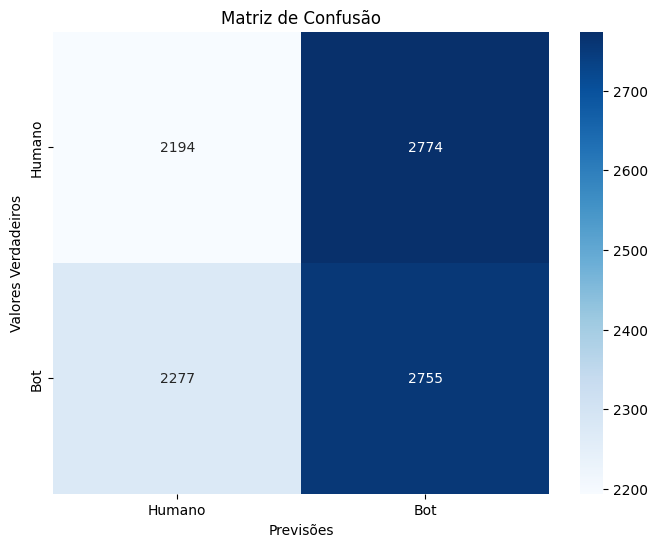

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    all_preds, all_labels = [], []
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)

        outputs = model(input_ids, attention_mask)
        predictions = (outputs.squeeze() > 0.5).float()

        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Humano', 'Bot'], yticklabels=['Humano', 'Bot'])
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()


In [21]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

model.eval()
with torch.no_grad():
    test_data = TensorDataset(torch.tensor(test_inputs), torch.tensor(test_masks), torch.tensor(test_labels))
    test_loader = DataLoader(test_data, batch_size=32)

    total_preds, total_labels = [], []

    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)

        outputs = model(input_ids, attention_mask)
        predictions = (outputs.squeeze() > 0.5).float()

        total_preds.extend(predictions.cpu().numpy())
        total_labels.extend(labels.numpy())

    # Avaliação
    accuracy = accuracy_score(total_labels, total_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(total_labels, total_preds, average='binary')
    auc = roc_auc_score(total_labels, total_preds)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'AUC: {auc:.2f}')


Accuracy: 0.49
Precision: 0.50
Recall: 0.55
F1 Score: 0.52
AUC: 0.49


### Resultados


Após treinar o modelo BERT para classificação binária, os seguintes resultados foram obtidos. Eles refletem a performance do modelo em detectar se um tweet é gerado por um bot ou por um humano.

- Accuracy (0.49): A acurácia do modelo indica que ele classificou corretamente 49% dos exemplos de teste. Este valor sugere que o modelo está performando apenas ligeiramente acima do acaso, o que indica que ainda há espaço para melhorias, tanto em termos de hiperparâmetros quanto no pré-processamento dos dados.

- Precision (0.50): A precisão mostra que, das previsões positivas feitas pelo modelo (tweets classificados como bots), 50% eram corretas. Isso significa que metade das previsões de bot do modelo foram verdadeiras.

- Recall (0.55): O recall mede a capacidade do modelo de identificar corretamente todos os tweets que são, de fato, bots. O valor de 55% significa que o modelo conseguiu identificar mais da metade dos bots, mas ainda está perdendo alguns.

- F1 Score (0.52): O F1 Score é a média harmônica entre precisão e recall. Com um valor de 0.52, o modelo tem um desempenho equilibrado entre sua capacidade de prever corretamente e sua capacidade de encontrar os bots reais, mas os resultados estão apenas moderados.

- AUC (0.49): A AUC (Area Under the Curve) avalia a capacidade do modelo em separar corretamente as classes (bots e humanos). Um valor de 0.49 indica que o modelo não está conseguindo distinguir bem entre as duas classes, já que um valor de 0.50 seria equivalente ao acaso

### Próximos Passos e Melhorias (1 ponto a mais da ponderada)


#### Ajuste de Hiperparâmetros:
- Testar diferentes taxas de aprendizado e tamanhos de batch para otimizar a performance do modelo.
- Implementar técnicas de ajuste de hiperparâmetros, como Grid Search ou Random Search, para encontrar os melhores valores de hiperparâmetros (taxa de dropout, número de épocas, etc.).

#### Aumento de Dados (Data Augmentation):
- Aplicar técnicas de data augmentation no texto, como substituição de sinônimos ou variações sintáticas, para aumentar a diversidade dos tweets e melhorar a generalização do modelo.

#### Exploração de Modelos Pré-Treinados Avançados:
- Considerar o uso de versões mais avançadas de BERT, como RoBERTa ou DistilBERT, que podem oferecer ganhos em performance com menos recursos computacionais.

#### Monitoramento e Manutenção do Modelo:
- Implementar uma abordagem de monitoramento contínuo para garantir que o modelo continue a ter um bom desempenho conforme novos dados forem coletados.
- Atualizar periodicamente o modelo com novos dados de treino, se possível, para manter sua eficácia e adaptá-lo a mudanças no padrão de uso.

#### Otimização do Tempo de Execução:
- Implementar técnicas de paralelização ou usar GPUs mais eficientes para acelerar o tempo de treinamento e inferência do modelo.
- Avaliar a possibilidade de utilizar quantização ou poda de modelos para reduzir a complexidade computacional sem perder acurácia.